In [1]:
#Importing libraries

#Basic libraries
import pandas as pd
import numpy as np
import os
# handling warnings
import warnings
warnings.filterwarnings('ignore')

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data modelling libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import metrics
#Statistics
from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.max_rows', 500)


In [2]:
# Creating a class color for setting print formatting
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   END = '\033[0m'


## Data Understanding

In [3]:
#Read the data and creating the dataframe
housing_df=pd.read_csv(r"C:\Users\LocalUser\Desktop\Upgrad\ML2\Assignment\train.csv")

In [4]:
# Check if data is loaded or not
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# inspect the first five rows of data
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# check the no of rows and columns
housing_df.shape

(1460, 81)

In [7]:
#info all the entire data along with types
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#Summary of the numerical columns in the dataframe
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#List of columns in the data frame
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
# Check if any null values are present in the data
housing_df.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Data Preparation - Missing value treatment

In [11]:
#Checking the number of missing values and its percentage
Total_missing = housing_df.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*housing_df.isnull().sum()/housing_df.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.head(80)

,Total_missing_values,Percent_missing_values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [12]:
# Checking how many columns have more than 45% of missing data

print(color.BOLD+ color.BLUE+'Total no of columns with missing values more than 45% : {}'.format(df_missing_values[df_missing_values['Percent_missing_values'] >= 45].shape[0])+ color.END)

Total no of columns with missing values more than 45% : 5


In [13]:
#Create a new dataframe named df_cleaned with all columns with data missing < 45% for our  further analysis

df_cleaned = housing_df.loc[:,(100*housing_df.isnull().sum()/housing_df.shape[0]).sort_values(ascending = False) < 45]
df_cleaned.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### Imputing other missing values columns

In [14]:
#Checking the no of unique values in each column
df_cleaned.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [15]:
# Get the value counts of all the columns

for column in df_cleaned:
    
    print(df_cleaned[column].astype('category').value_counts())
    print('___________________________________________________')


1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
___________________________________________________
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
___________________________________________________
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
___________________________________________________
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
68.0      19
24.0      19
73.0      18
63.0      17
79.0      17
55.0      17
72.0      17
100.0     16
51.0      15
74.0      15
66.0      15
52.0      14
59.0      13
71.0      12
82.0      12
57.0      12
67.0      12
43.0      12
40.0      12
76

## DATA IMPUTATION FOR CATEGORICAL COLUMNS

In [16]:
df_cleaned.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [17]:
# Most of the values are TA, so we can map the NAN values of 'GarageQual' to TA -MODE
df_cleaned['GarageQual'] = df_cleaned['GarageQual'].replace(np.nan,'TA')

In [18]:
df_cleaned['GarageQual'].dtype

dtype('O')

In [19]:
df_cleaned.GarageQual.value_counts()

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [20]:
df_cleaned.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [21]:
df_cleaned['GarageFinish']=df_cleaned['GarageFinish'].replace(np.nan,'Unknown')


In [22]:
df_cleaned.GarageFinish.value_counts()

Unf        605
RFn        422
Fin        352
Unknown     81
Name: GarageFinish, dtype: int64

In [23]:
# Most of the values are ATTCHD , so we can map the NAN values of 'GarageType' to ATTCHD (MODE)
df_cleaned['GarageType'] = df_cleaned['GarageType'].replace(np.nan,'Attchd')


In [24]:
df_cleaned.GarageType.value_counts()


Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [25]:
df_cleaned.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [26]:
# Most of the values is TA , so we can map the NAN values of 'GarageCond' to TA -MODE
df_cleaned['GarageCond'] = df_cleaned['GarageCond'].replace(np.nan,'TA')

In [27]:
df_cleaned.GarageCond.value_counts()


TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

## DATA IMPUTATION FOR NUMERICAL COLUMNS

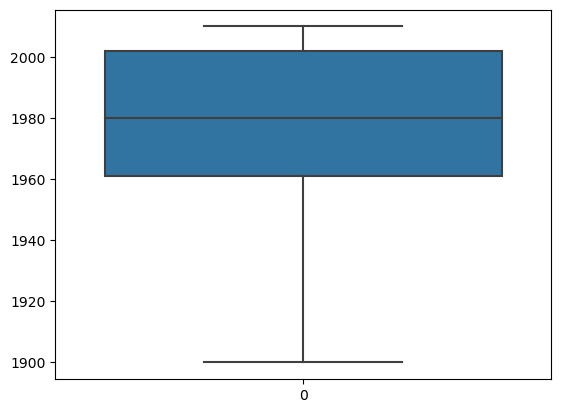

In [28]:
#PLots for outlier analysis of GarageYrBlt
sns.boxplot(df_cleaned.GarageYrBlt)
plt.show()

In [29]:
df_cleaned['GarageYrBlt'].fillna(df_cleaned['GarageYrBlt'].mean(),inplace=True)

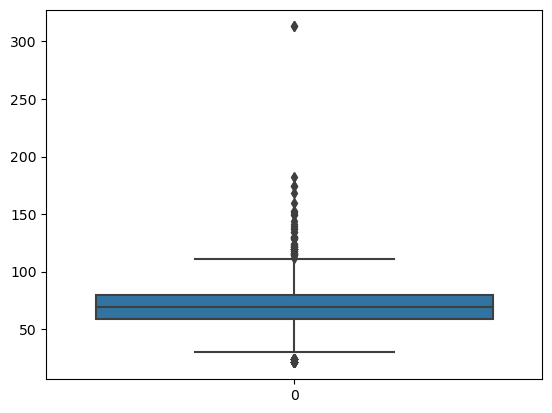

In [30]:
#PLots for outlier analysis for LotFrontage
sns.boxplot(df_cleaned.LotFrontage)
plt.show()

#### As there are outliers imputing with median

In [31]:
df_cleaned['LotFrontage'].fillna(df_cleaned['LotFrontage'].median(),inplace=True)

In [32]:
# As the other columns have less than 3% of Nan Values we chose to drop those rows .

df_cleaned.dropna(inplace=True)

In [33]:
#Final check of missing values 
Total_missing = df_cleaned.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df_cleaned.isnull().sum()/df_cleaned.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
Id,0,0.0
FullBath,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
HalfBath,0,0.0
BsmtHalfBath,0,0.0


## All missing values are handled!!!

## Data Exploration - Exploratory data analysis

In [34]:
df_cleaned.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [35]:
df_cleaned['Age']=df_cleaned['YrSold']-df_cleaned['YearRemodAdd']
df_cleaned['Age'].head()

0     5
1    31
2     6
3    36
4     8
Name: Age, dtype: int64

In [36]:
df_cleaned=df_cleaned.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd'], axis = 1) 

In [37]:
df_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,WD,Normal,223500,6
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,WD,Abnorml,140000,36
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,WD,Normal,250000,8


In [38]:
df_cleaned=df_cleaned.drop(['Id'], axis = 1) 

#### Numerical columns of our data set

In [39]:
numeric_feats = df_cleaned.dtypes[df_cleaned.dtypes != "object"].index
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age'],
      dtype='object')

#### Univariate analysis of numerical columns


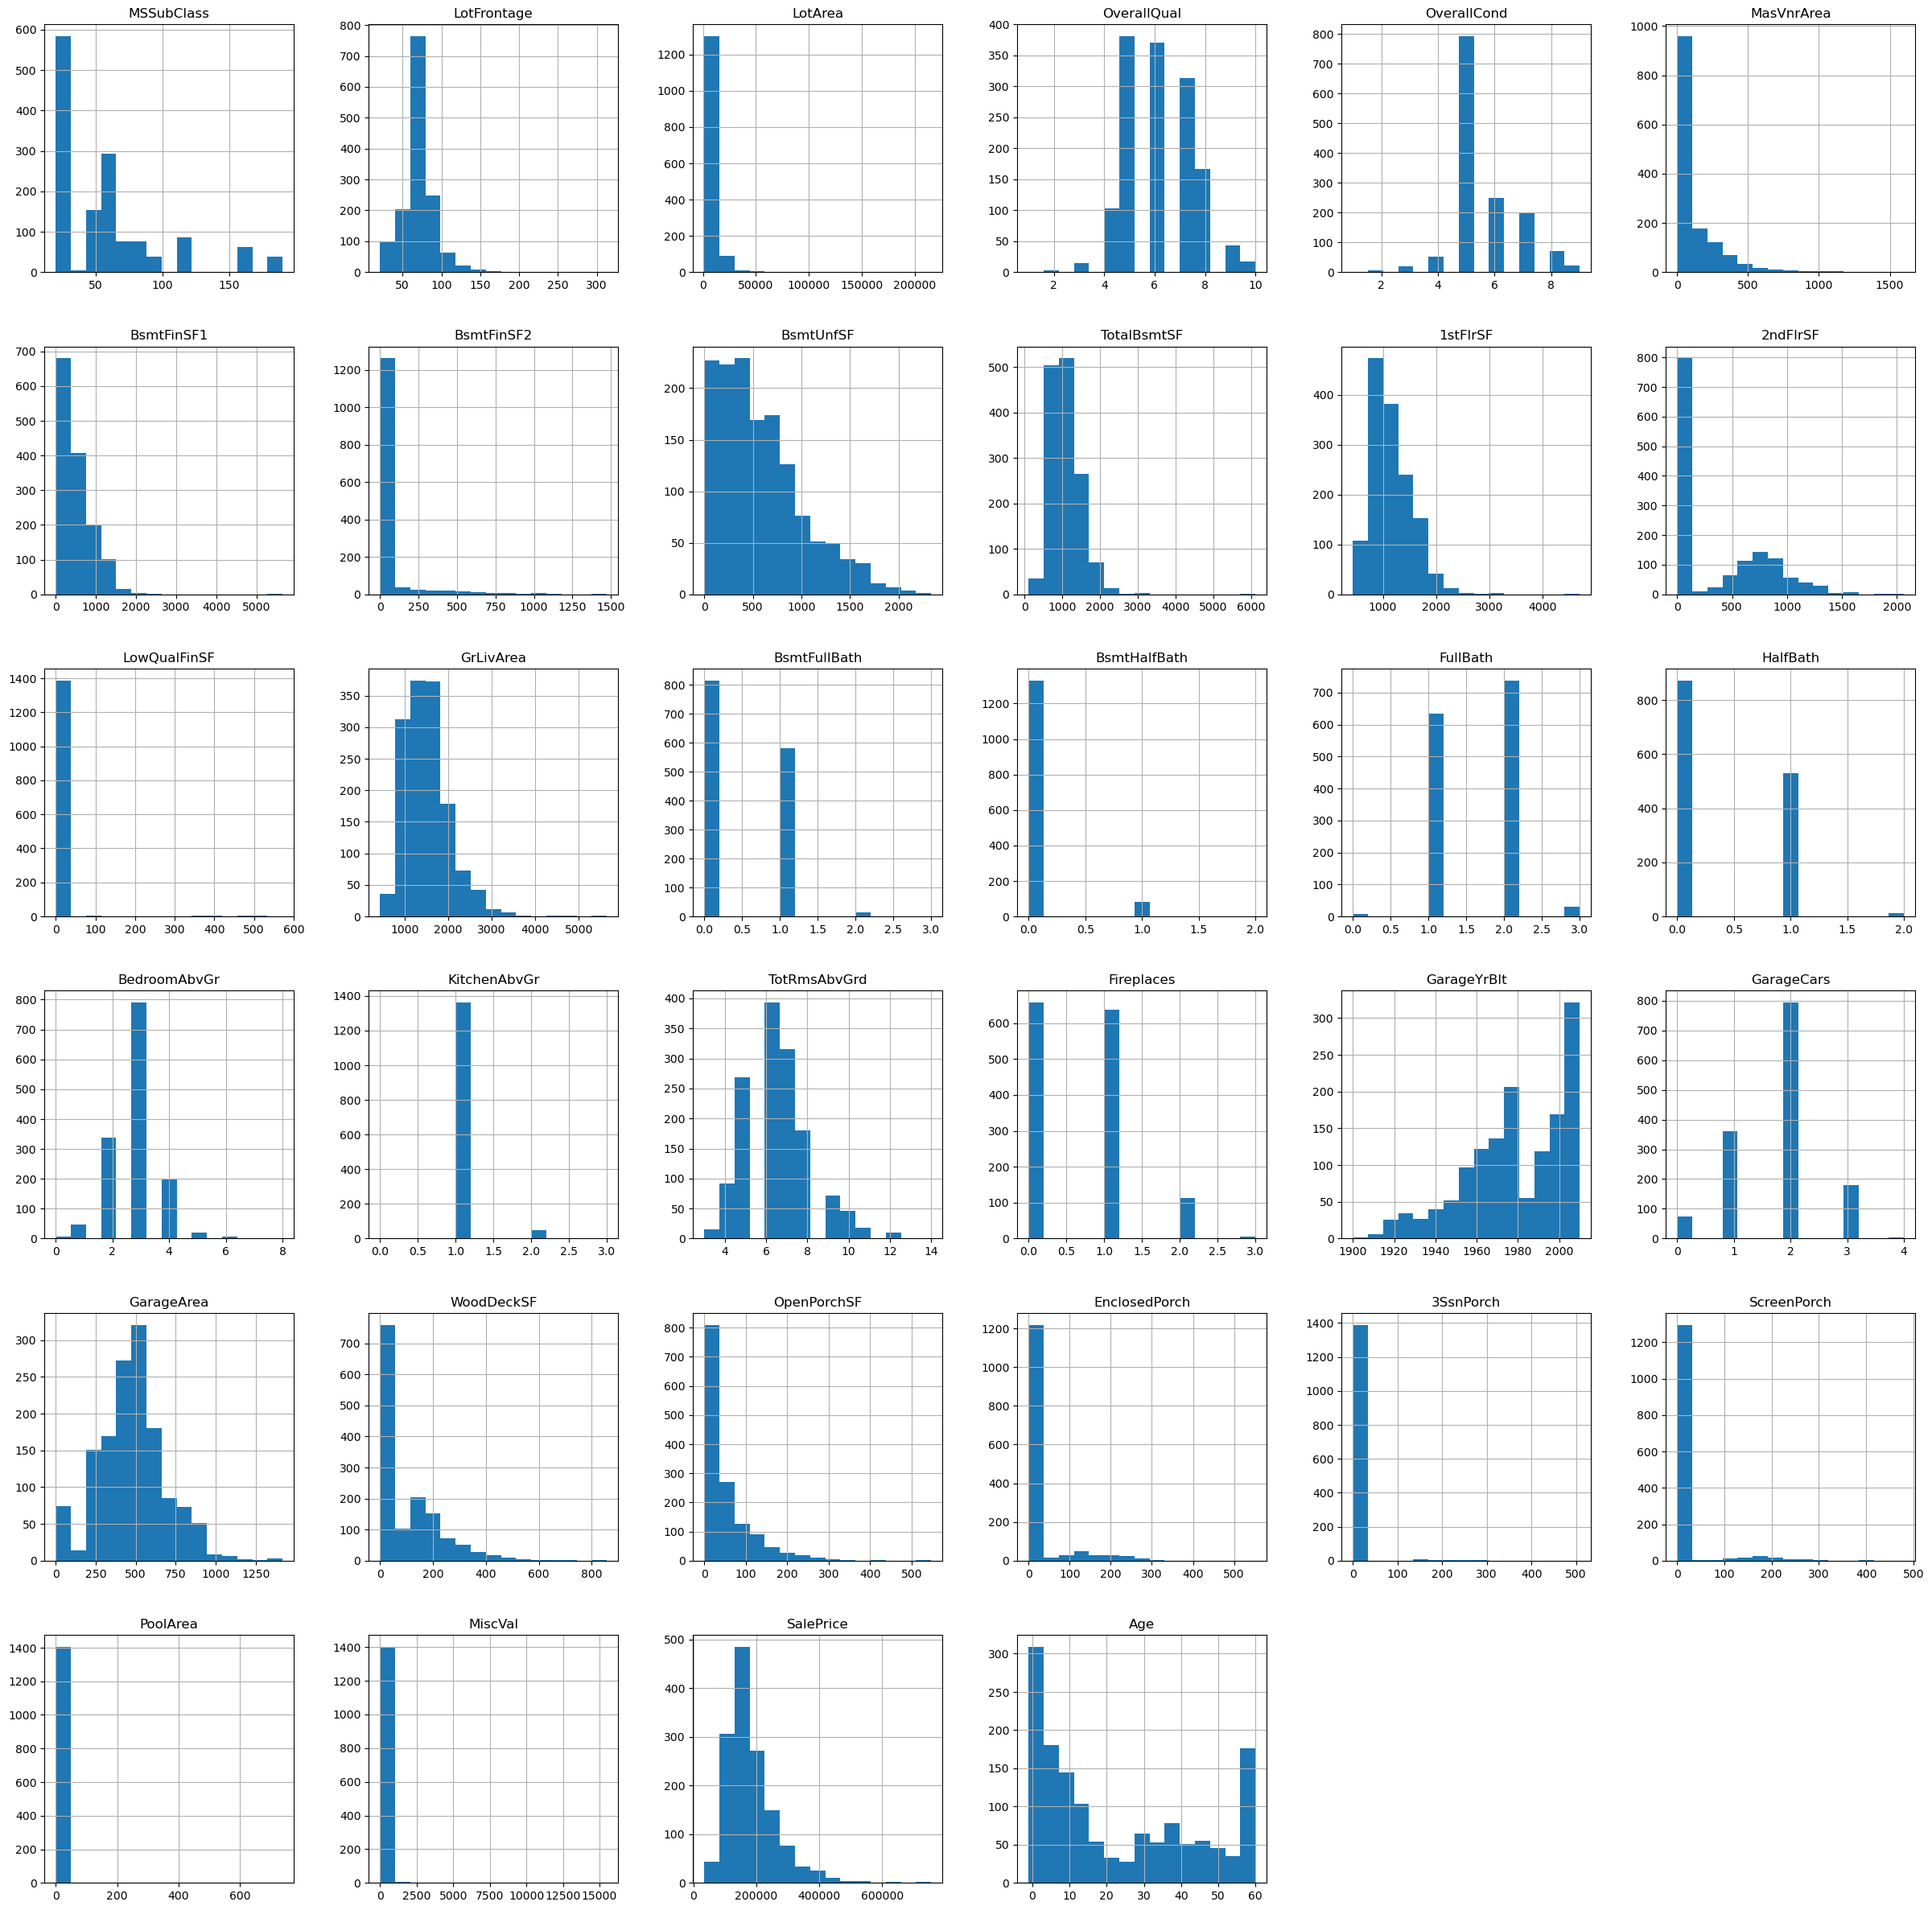

In [40]:
df_cleaned[numeric_feats].hist(bins=15, figsize=(30, 30))
plt.show()

#### We see that few variables are highly skewed and there might be possiblity that they can be coralted with each other as well which is This is very difficlut to interpret from univairate analysis.

In [41]:
# correlation matrix
cor = df_cleaned.corr()
cor


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age
MSSubClass,1.000000,-0.359784,-0.138298,0.038952,-0.063240,0.023024,-0.067783,-0.064875,-0.139572,-0.253332,...,-0.094523,-0.014568,-0.005684,-0.016768,-0.041226,-0.026202,0.008496,-0.022705,-0.082281,-0.045620
LotFrontage,-0.359784,1.000000,0.303055,0.232893,-0.055121,0.179106,0.214046,0.040468,0.118356,0.385093,...,0.324805,0.073858,0.133934,0.012227,0.064597,0.036986,0.181510,-0.000569,0.333348,-0.078883
LotArea,-0.138298,0.303055,1.000000,0.104763,-0.002941,0.104010,0.213450,0.111381,-0.008757,0.275637,...,0.180207,0.172281,0.083860,-0.022978,0.021153,0.042818,0.077814,0.041567,0.264803,-0.011599
OverallQual,0.038952,0.232893,0.104763,1.000000,-0.121155,0.409656,0.211652,-0.072897,0.278239,0.509473,...,0.561612,0.230274,0.297678,-0.122678,0.032014,0.059290,0.065474,-0.025344,0.786765,-0.541616
OverallCond,-0.063240,-0.055121,-0.002941,-0.121155,1.000000,-0.134961,-0.057034,0.036885,-0.159769,-0.221992,...,-0.163341,-0.013206,-0.041823,0.075663,0.022557,0.050897,-0.003298,0.070685,-0.093567,-0.054196
MasVnrArea,0.023024,0.179106,0.104010,0.409656,-0.134961,1.000000,0.259291,-0.077978,0.103094,0.371677,...,0.370982,0.157566,0.124018,-0.116271,0.018240,0.059422,0.011161,-0.027143,0.474525,-0.172425
BsmtFinSF1,-0.067783,0.214046,0.213450,0.211652,-0.057034,0.259291,1.000000,-0.060807,-0.551475,0.504307,...,0.288913,0.196236,0.098352,-0.109122,0.028958,0.057169,0.141557,0.009120,0.368849,-0.109209
BsmtFinSF2,-0.064875,0.040468,0.111381,-0.072897,0.036885,-0.077978,-0.060807,1.000000,-0.229907,0.086766,...,-0.025604,0.065614,0.002020,0.037693,-0.030142,0.087231,0.041342,0.006542,-0.020196,0.078440
BsmtUnfSF,-0.139572,0.118356,-0.008757,0.278239,-0.159769,0.103094,-0.551475,-0.229907,1.000000,0.367804,...,0.170188,-0.022720,0.118343,-0.003900,0.023565,-0.021628,-0.038245,-0.017937,0.188959,-0.161609
TotalBsmtSF,-0.253332,0.385093,0.275637,0.509473,-0.221992,0.371677,0.504307,0.086766,0.367804,1.000000,...,0.498678,0.222698,0.239398,-0.111764,0.045885,0.076152,0.134601,-0.006489,0.611084,-0.265902


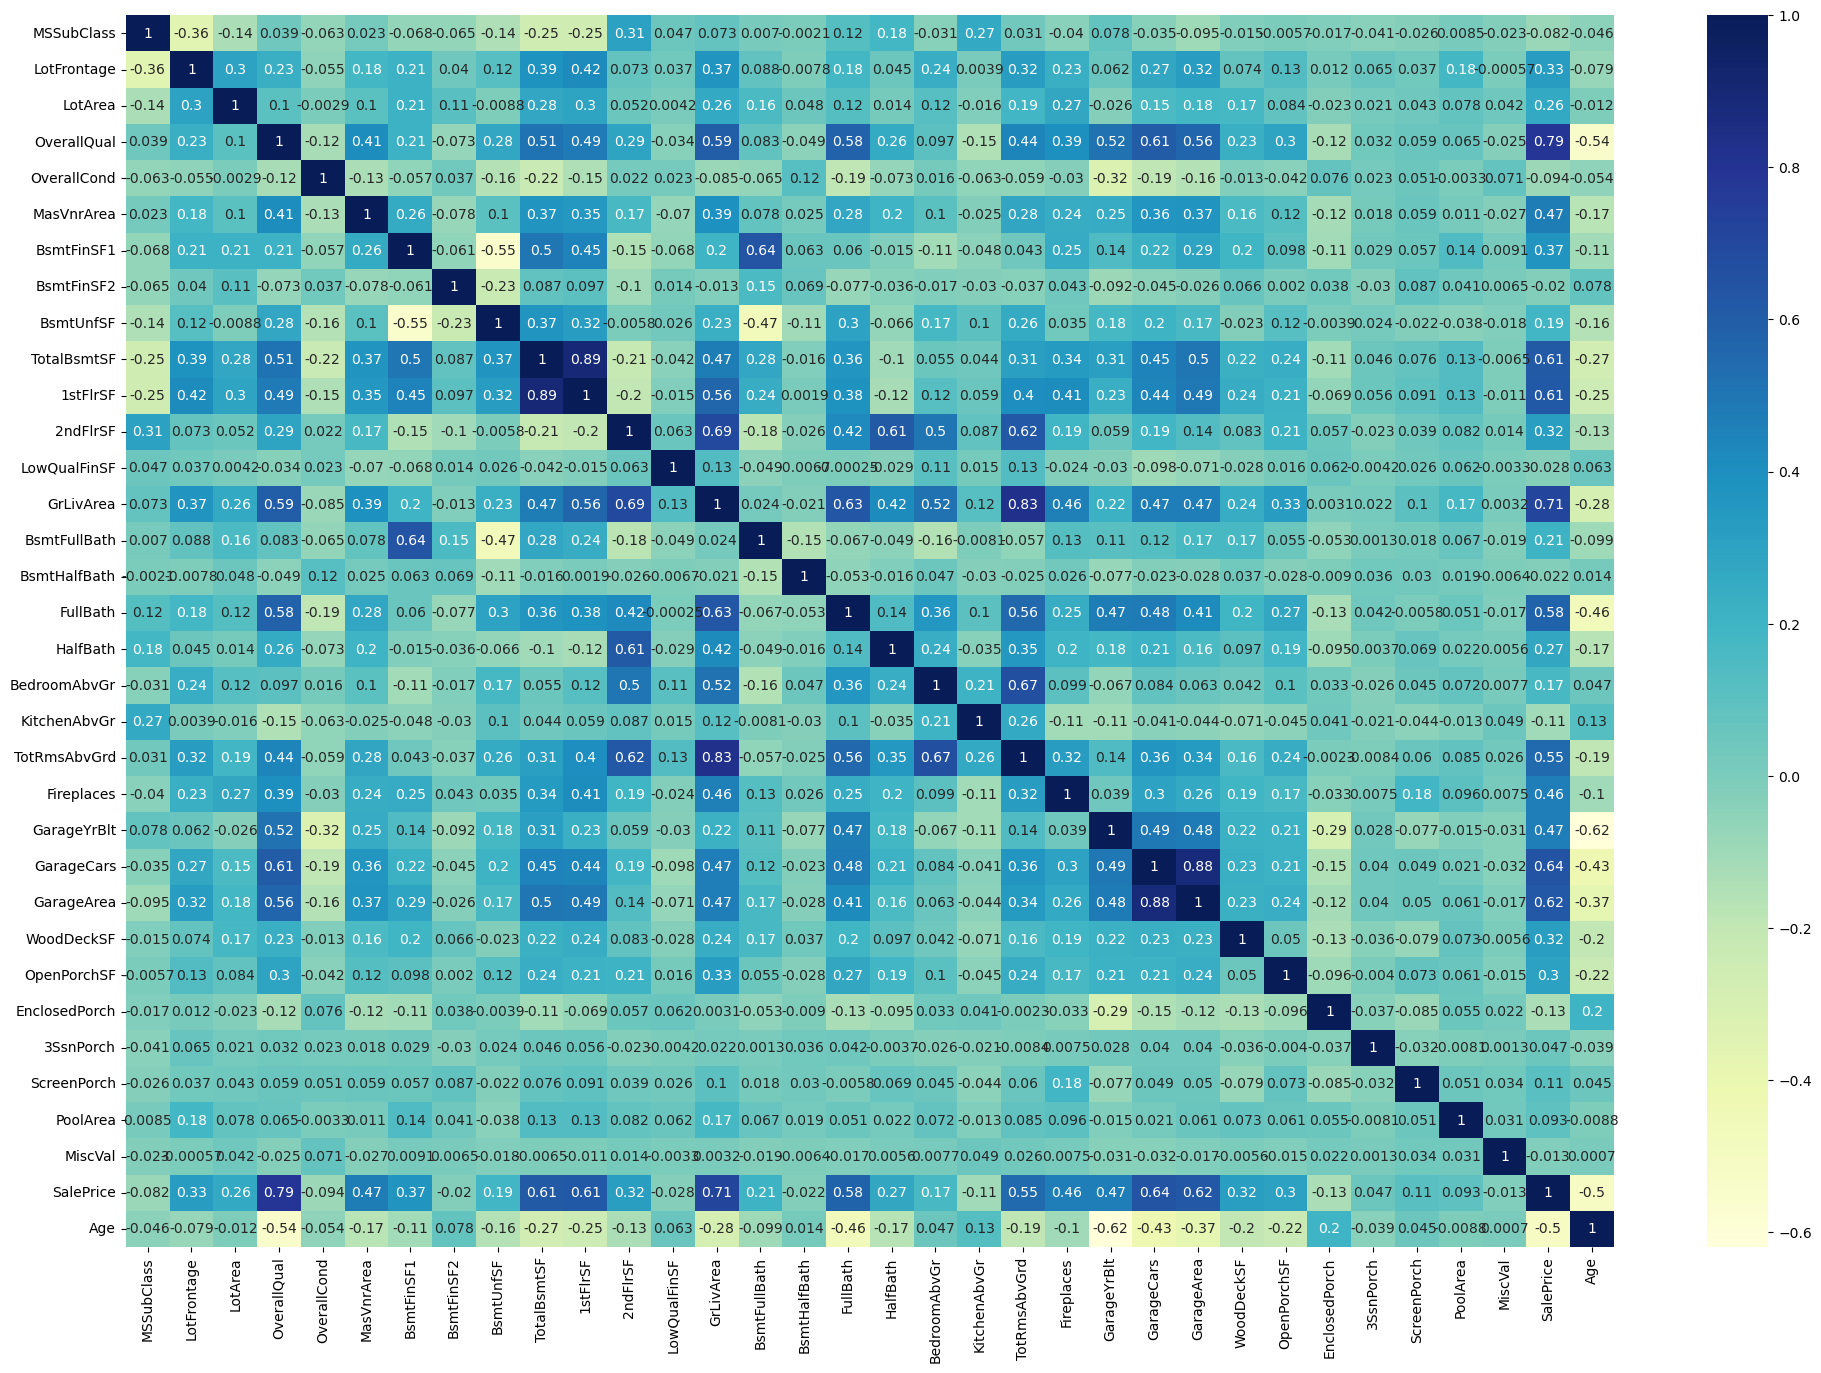

In [42]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### Inferences: Based on the correlation we can make few following interpretions

##### SalePrice is very high positively correlated to the Overall Quality(0.79)
##### SalePrice is very high positively correlated to the 1stFlrSF (0.61)
##### SalePrice is very high positively correlated to the TotalBsmtSF (0.61)
##### SalePrice is very high positively correlated to the GrLivArea (0.71)
##### SalePrice is very high positively correlated to the FullBath(0.58)
##### SalePrice is very high positively correlated to the TotRmsAbvGrd(0.55)
##### SalePrice is very high positively correlated to the GarageCars(0.64)
##### SalePrice is very high positively correlated to the GarageAre(0.62)
##### SalePrice is very high negatively correlated to the Age(-0.5)


##### The above variables are top ten correlated.
###### Bivariate analysis of these top 10 correlated variables with saleprice using pairplot

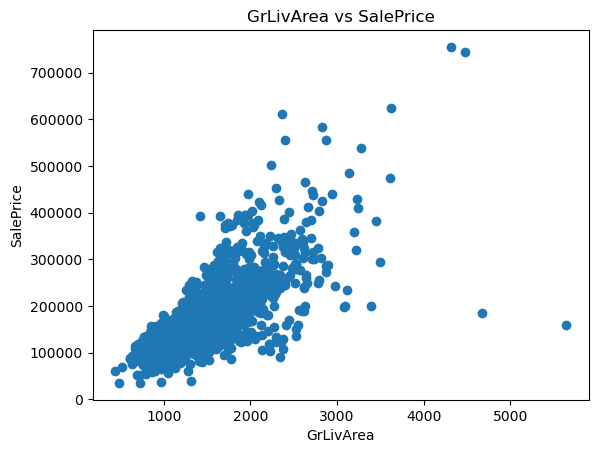

In [43]:
plt.scatter(df_cleaned.GrLivArea, df_cleaned.SalePrice)

plt.title('GrLivArea vs SalePrice')

plt.xlabel('GrLivArea')

plt.ylabel('SalePrice')

plt.show()

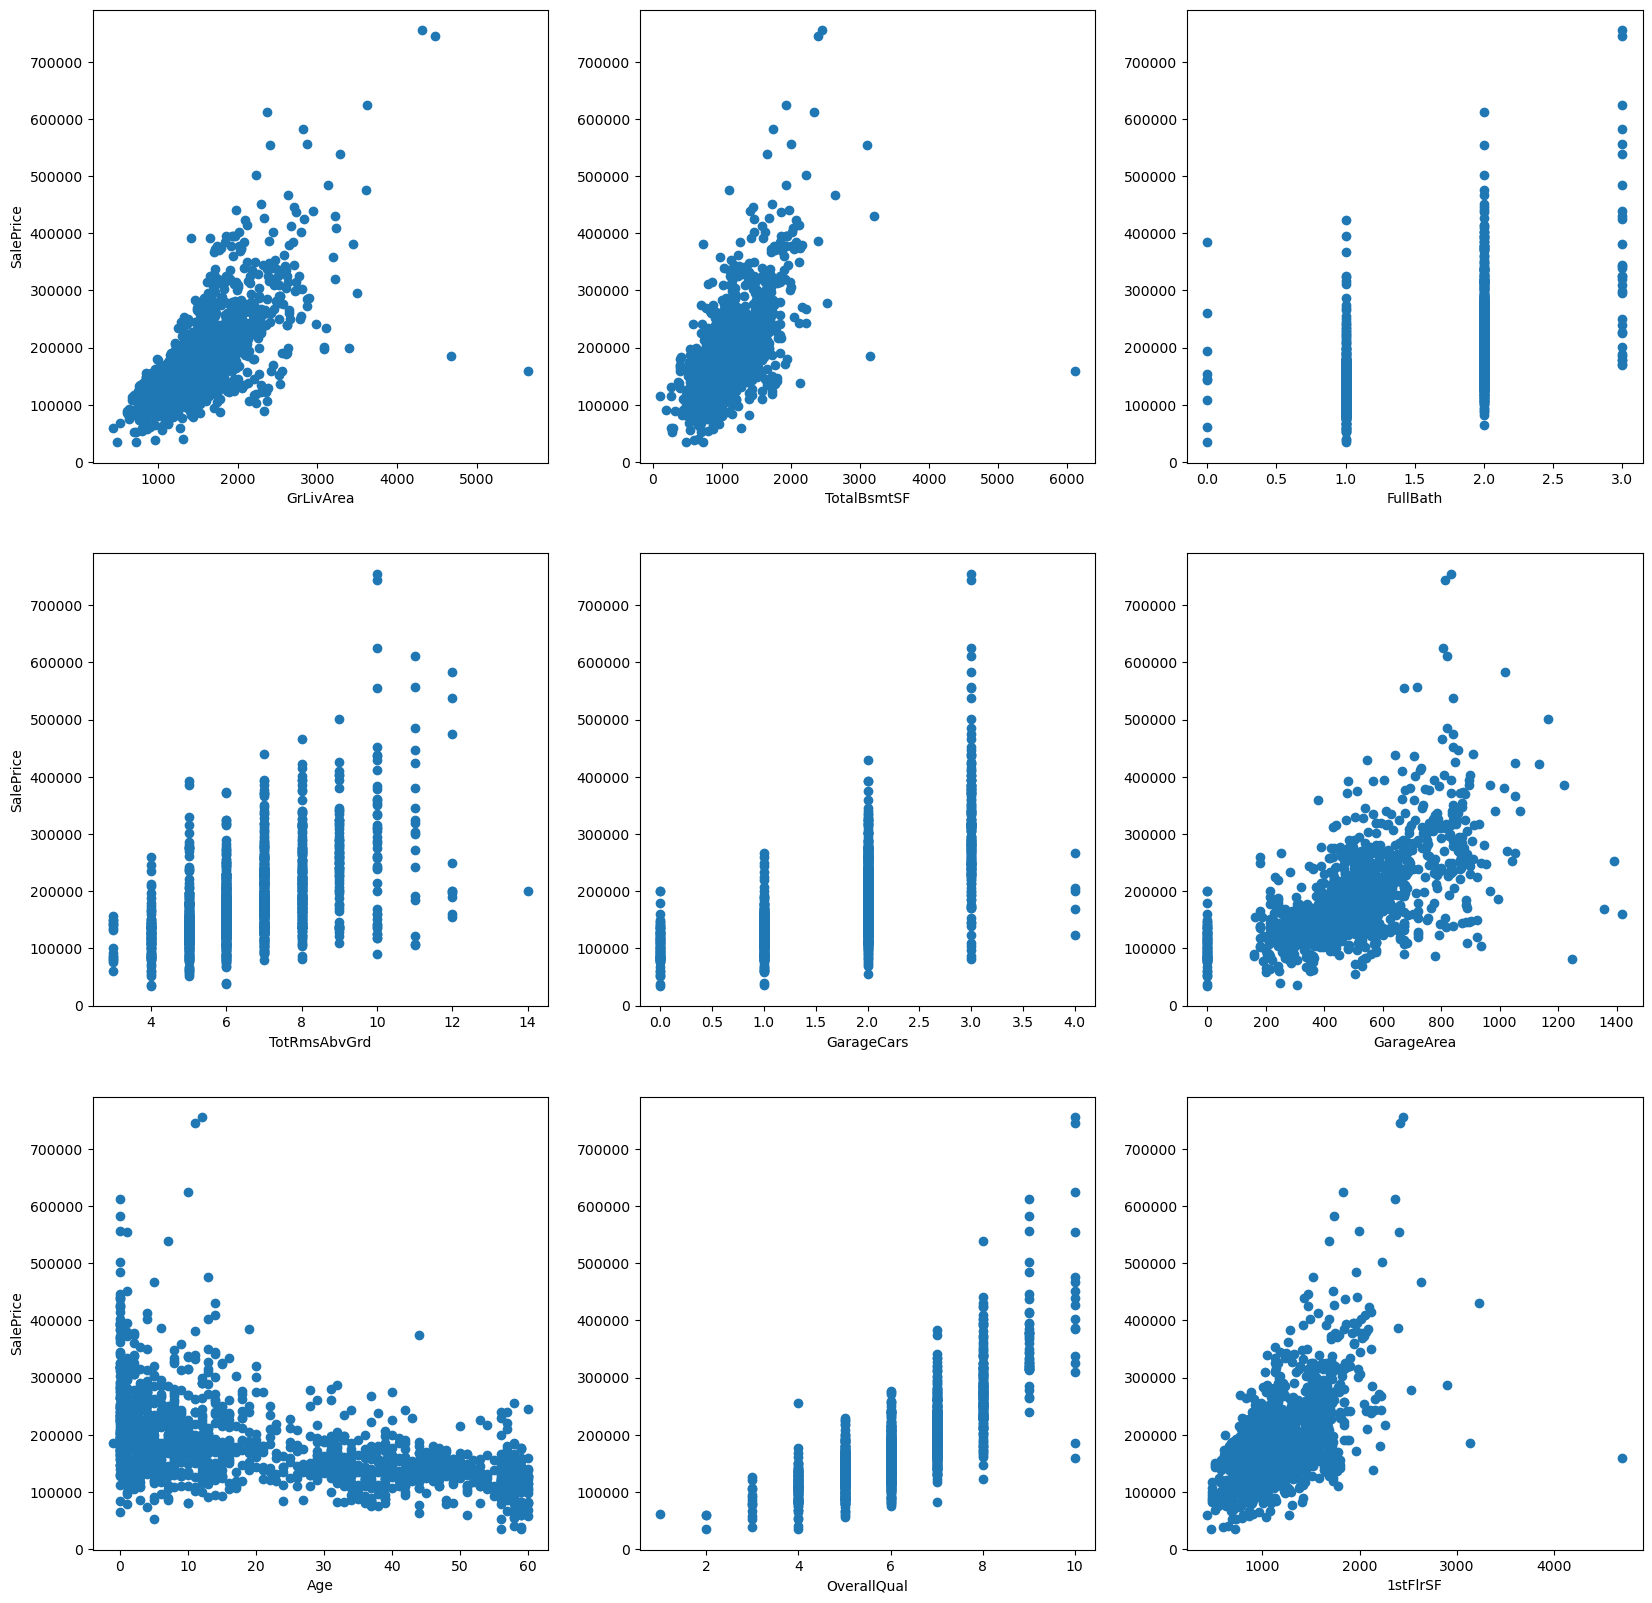

In [44]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
plt.scatter(df_cleaned.GrLivArea, df_cleaned.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.subplot(3,3,2)
plt.scatter(df_cleaned.TotalBsmtSF, df_cleaned.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.subplot(3,3,3)
plt.scatter(df_cleaned.FullBath, df_cleaned.SalePrice)
plt.xlabel('FullBath')
plt.subplot(3,3,4)
plt.scatter(df_cleaned.TotRmsAbvGrd, df_cleaned.SalePrice)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.subplot(3,3,5)
plt.scatter(df_cleaned.GarageCars, df_cleaned.SalePrice)
plt.xlabel('GarageCars')
plt.subplot(3,3,6)
plt.scatter(df_cleaned.GarageArea, df_cleaned.SalePrice)
plt.xlabel('GarageArea')
plt.subplot(3,3,7)
plt.scatter(df_cleaned.Age, df_cleaned.SalePrice)
plt.xlabel('Age')
plt.ylabel('SalePrice')
plt.subplot(3,3,8)
plt.scatter(df_cleaned.OverallQual, df_cleaned.SalePrice)
plt.xlabel('OverallQual')
plt.subplot(3,3,9)
plt.scatter(df_cleaned['1stFlrSF'], df_cleaned.SalePrice)
plt.xlabel('1stFlrSF')
plt.show()

#### Inferences :

###### We see that most of the variables are linearly correlated to SalePrice so there is a scope of doing the regresssion model.
###### We even observe that some variables like FullBath, GarageCars are not continuously distributed so we can encode them according to theie characteritics.


#### Categorical columns of our data set

In [45]:
cat_feats  = df_cleaned.dtypes[df_cleaned.dtypes == "object"].index
cat_feats  


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

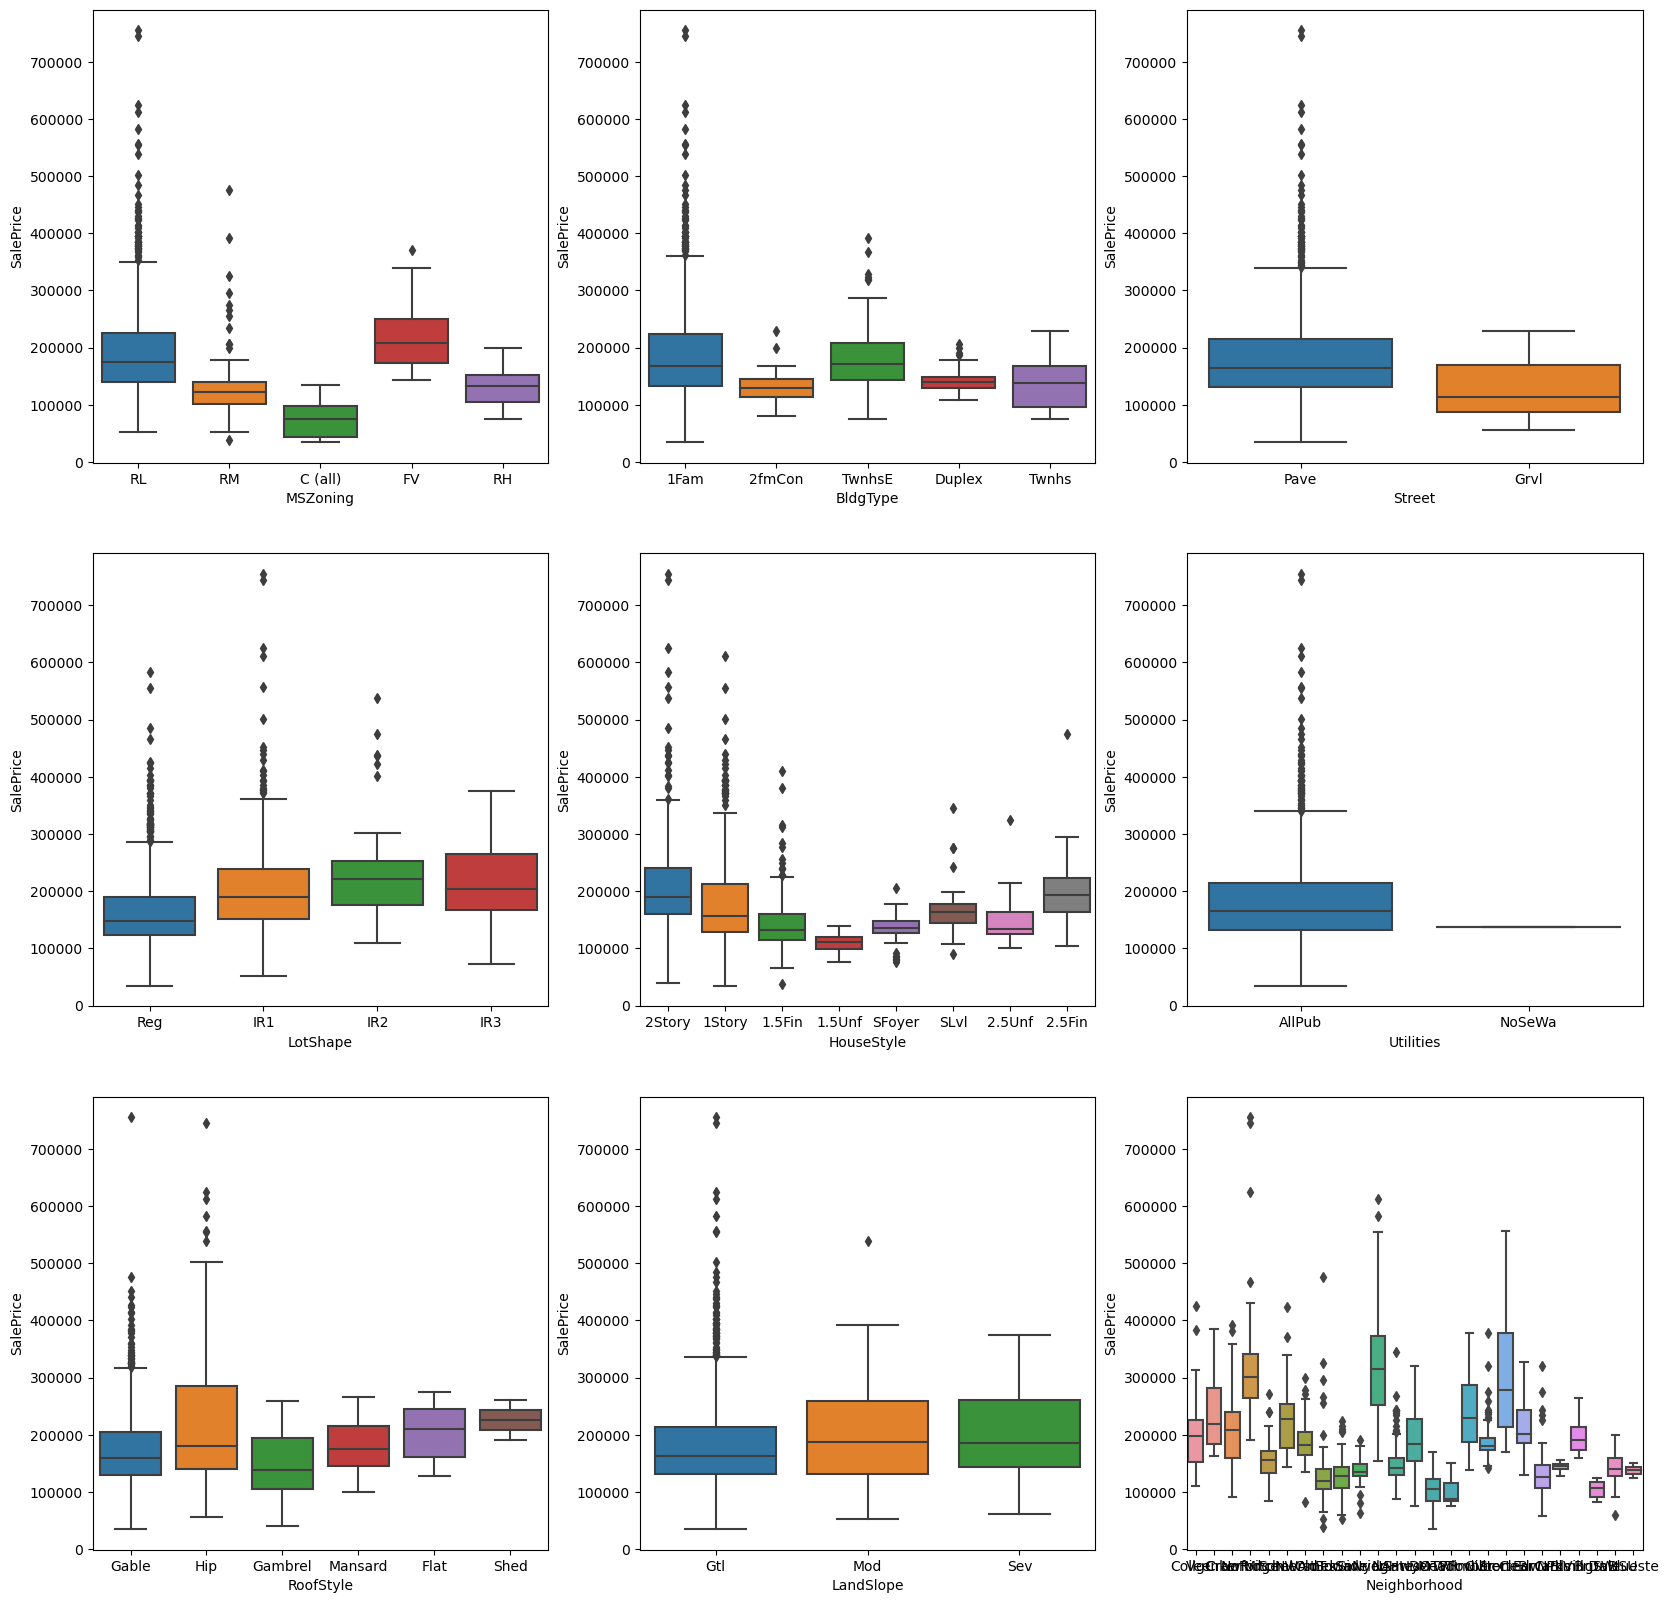

In [46]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='MSZoning', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,2)
sns.boxplot(x='BldgType', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,3)
sns.boxplot(x='Street', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,4)
sns.boxplot(x='LotShape', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,5)
sns.boxplot(x='HouseStyle', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,6)
sns.boxplot(x='Utilities', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,7)
sns.boxplot(x='RoofStyle', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,8)
sns.boxplot(x='LandSlope', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,9)
sns.boxplot(x='Neighborhood', y="SalePrice", data=df_cleaned)
plt.show()


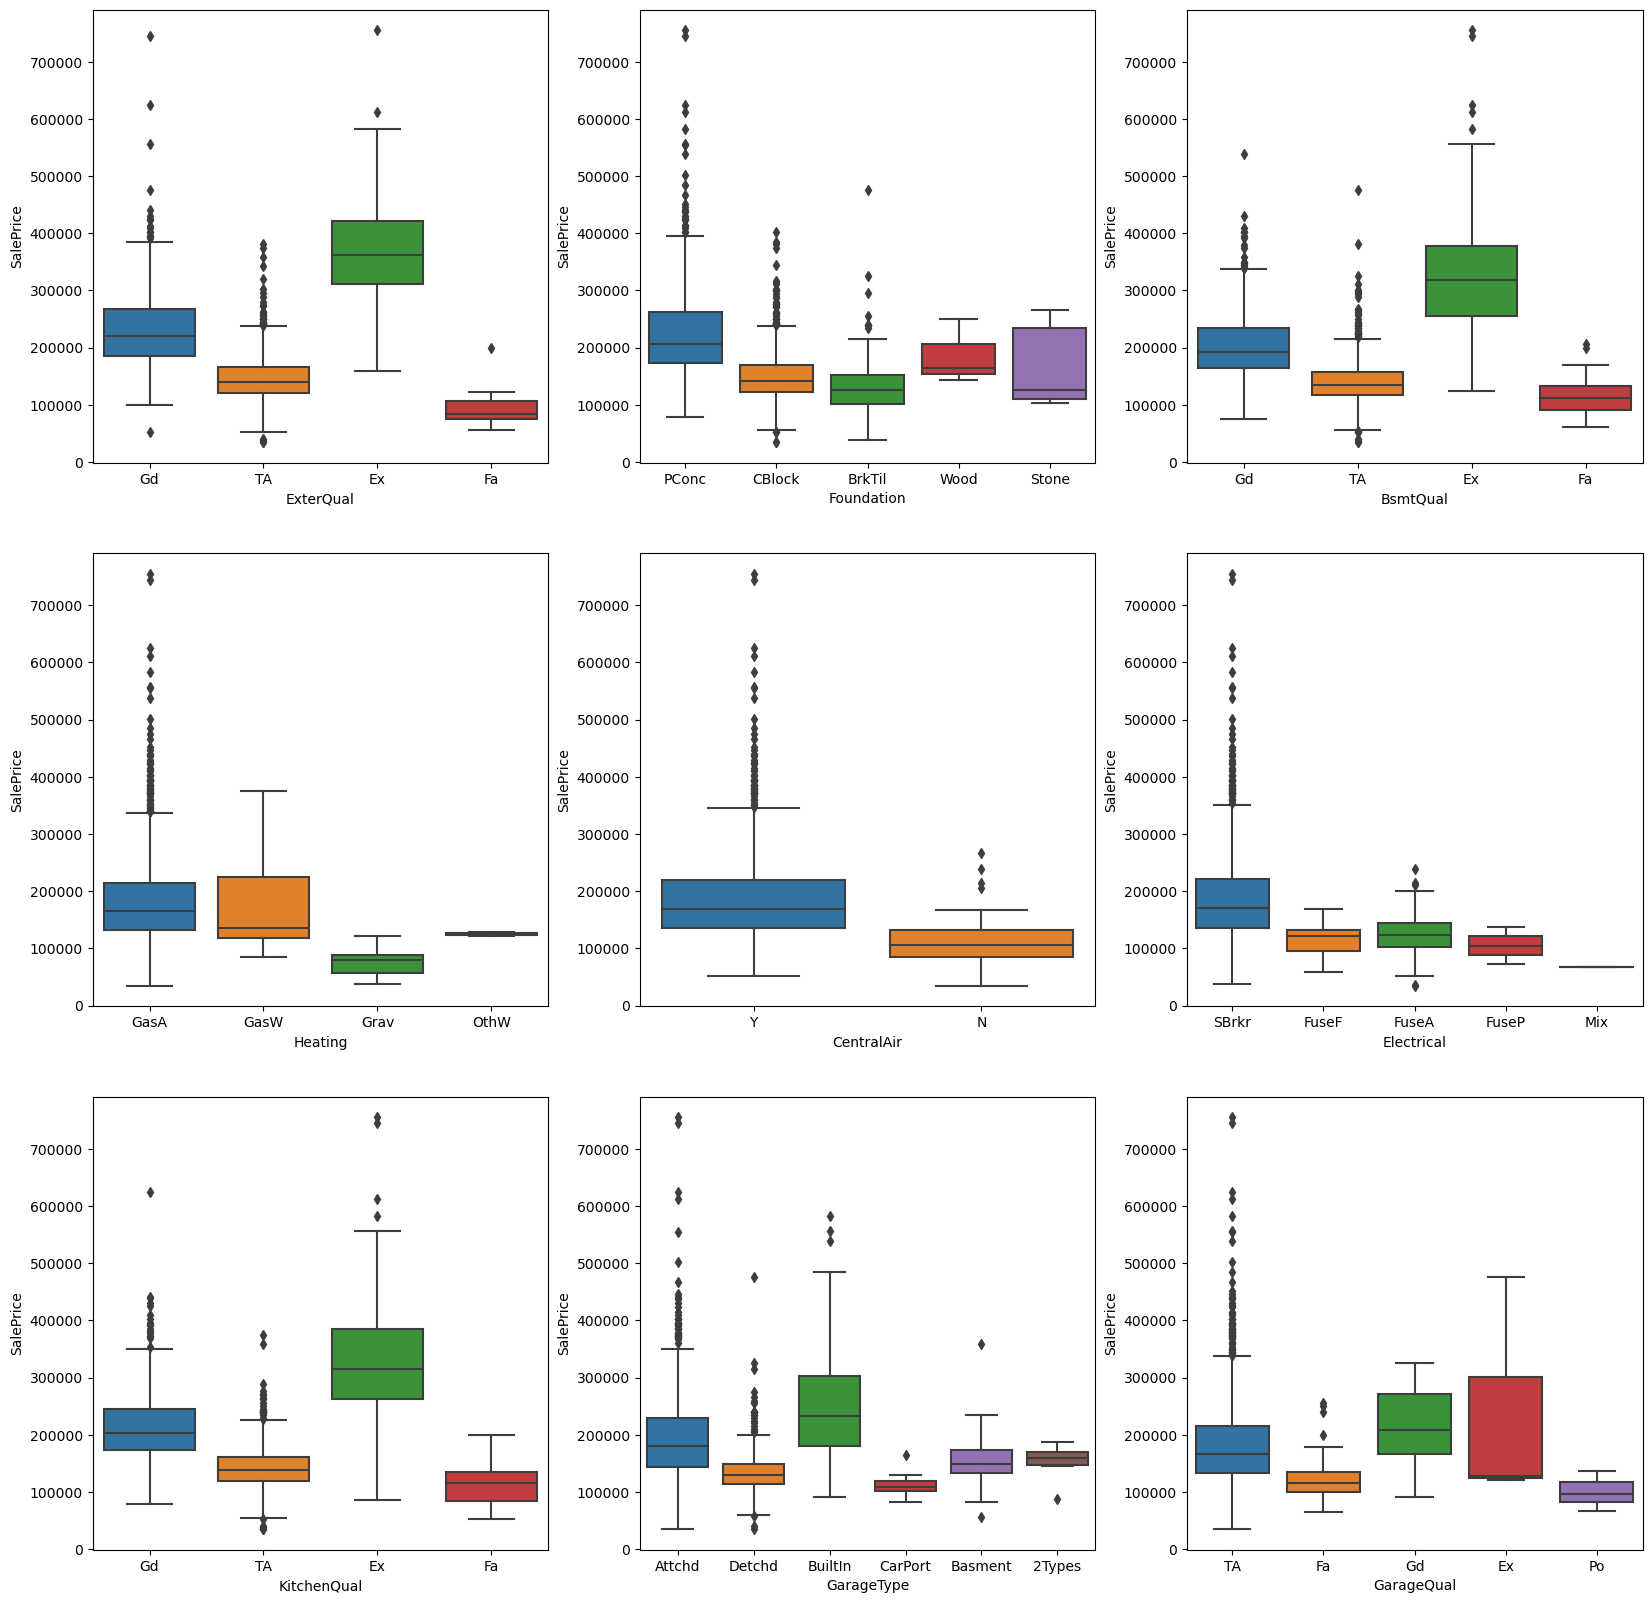

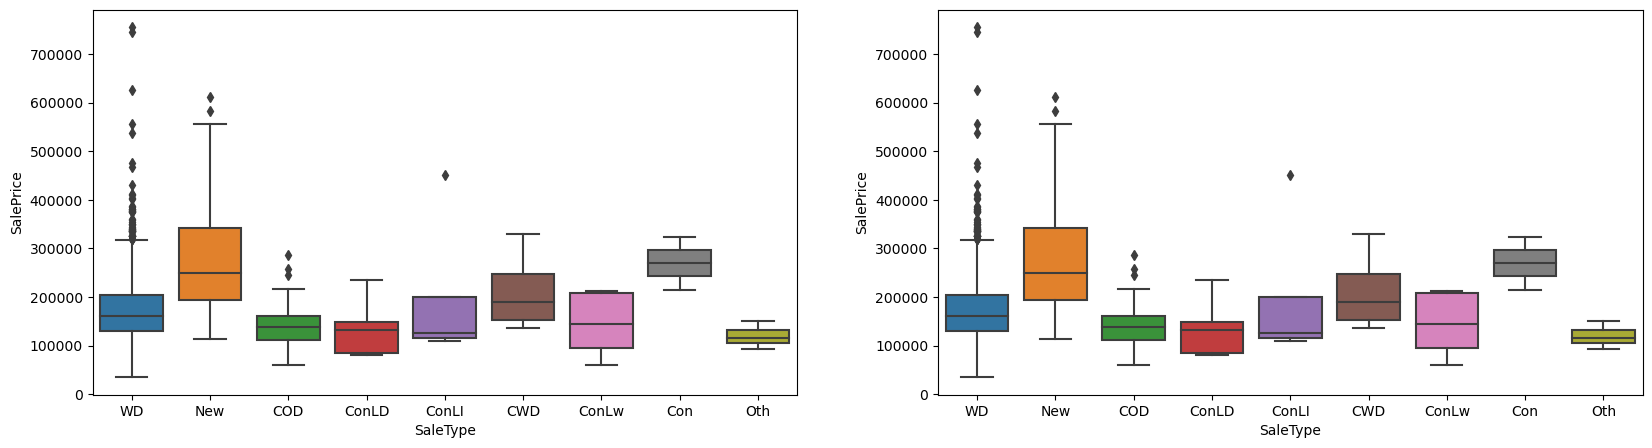

In [47]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='ExterQual', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,2)
sns.boxplot(x='Foundation', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,3)
sns.boxplot(x='BsmtQual', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,4)
sns.boxplot(x='Heating', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,5)
sns.boxplot(x='CentralAir', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,6)
sns.boxplot(x='Electrical', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,7)
sns.boxplot(x='KitchenQual', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,8)
sns.boxplot(x='GarageType', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,9)
sns.boxplot(x='GarageQual', y="SalePrice", data=df_cleaned)
plt.show()
plt.figure(figsize = (20,5)) 
plt.subplot(1,2,1)
sns.boxplot(x='SaleType', y="SalePrice", data=df_cleaned)
plt.subplot(1,2,2)
sns.boxplot(x='SaleType', y="SalePrice", data=df_cleaned)
plt.show()

#### Inferences -

###### MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price
###### The Street of type 'Pave' has more Sale Price when compared to 'Grvl'
###### the utlities coulms have most of its values as 'AllPub' So we this column have give much of an informration. - ITs not an important feature.
###### The house with Exterior Quality of type Execellent has the highest SalePrice.
###### The house with Basement Quality of type Execellent has the highest SalePrice.
###### The house with Kitchen Quality of type Execellent has the highest SalePrice.
###### The house with Garage Quality of type Execellent has the highest SalePrice.
###### The house with Garage Type of type BuiltIn has the highest SalePrice.
###### The house with Sale Type of type New has the highest SalePrice.
###### The Central air of type 'Yes' has more Sale Price when compared to 'No'


####  Data Preprocessing - Tranforming the Target variable(SalePrice)

## Target variable
#### SalePrice is the variable we need to predict. So let's do some analysis on this variable first.



In [48]:
df_cleaned['SalePrice'].describe()

count      1412.000000
mean     182507.021955
std       79270.416057
min       34900.000000
25%      131475.000000
50%      164600.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

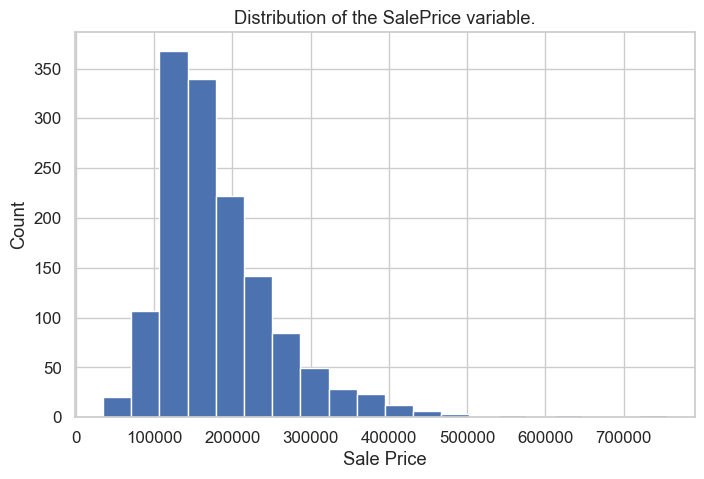

In [49]:
#Check the distribution the SalePrice
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(df_cleaned['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()



 mu = 182507.02 and sigma = 79242.34



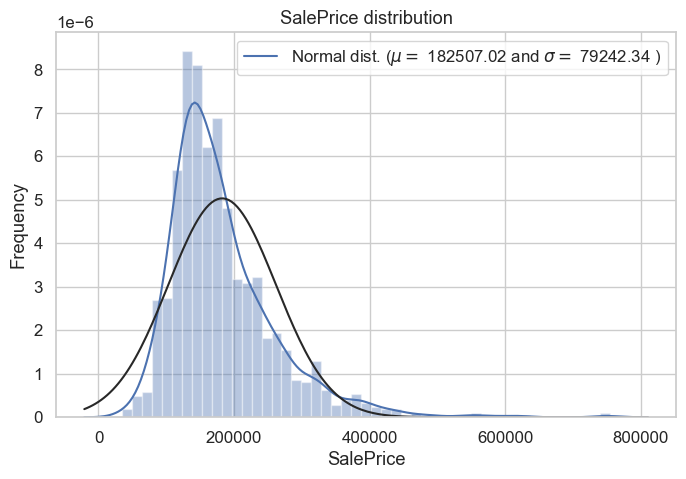

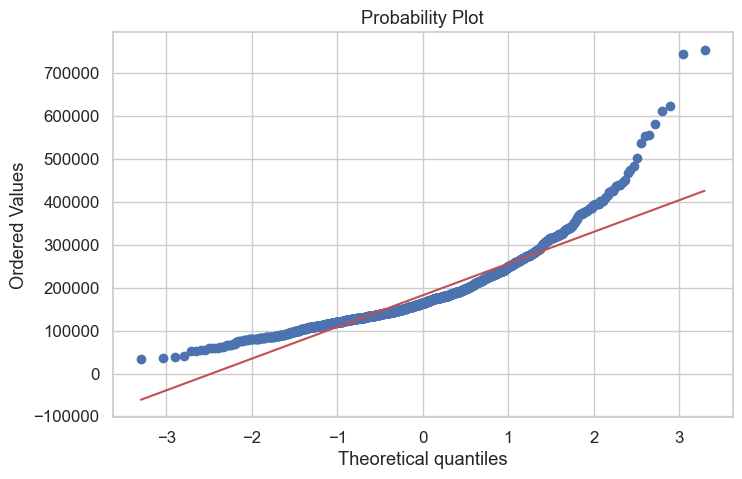

In [50]:
sns.distplot(df_cleaned['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(df_cleaned['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(df_cleaned['SalePrice'], plot=plt)
plt.show()

### Log-transformation of the target variable



 mu = 12.03 and sigma = 0.39



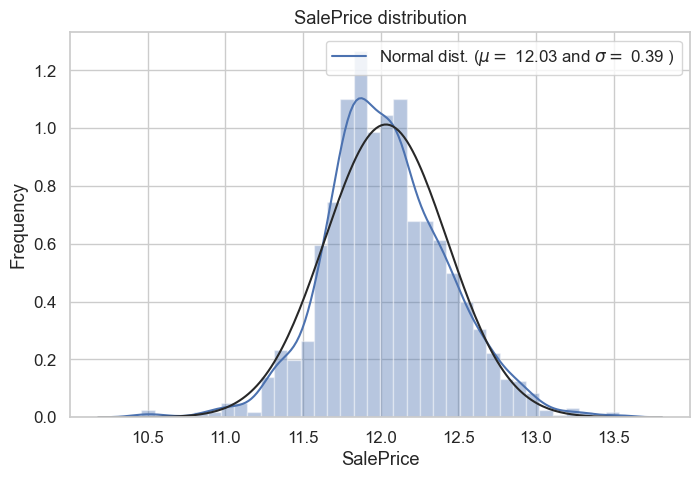

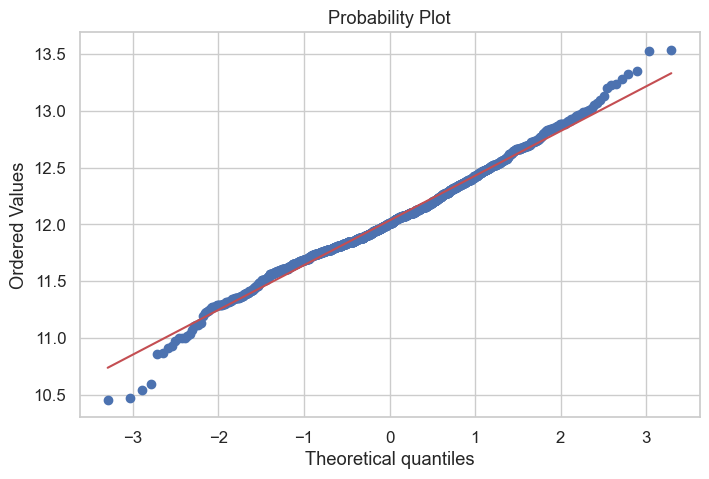

In [51]:
#We use the numpy function log to all elements of the column
df_cleaned["SalePrice"] = np.log(df_cleaned["SalePrice"])

#Checking the new distribution 
sns.distplot(df_cleaned['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(df_cleaned['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(df_cleaned['SalePrice'], plot=plt)
plt.show()


## Data Preprocessing - Manual Encoding few categorical variables

In [52]:
# List of variables to map
def map_function(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'Na':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_function3(x):
    return x.map({'Y':1,'N':0})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})

df_cleaned['ExterQual'] = df_cleaned[['ExterQual']].apply(map_function)
df_cleaned['ExterCond'] = df_cleaned[['ExterCond']].apply(map_function)
df_cleaned['BsmtQual'] = df_cleaned[['BsmtQual']].apply(map_function)
df_cleaned['BsmtCond'] = df_cleaned[['BsmtCond']].apply(map_function)
df_cleaned['BsmtExposure'] = df_cleaned[['BsmtExposure']].apply(map_function1)
df_cleaned['BsmtFinType1'] = df_cleaned[['BsmtFinType1']].apply(map_function2)
df_cleaned['BsmtFinType2'] = df_cleaned[['BsmtFinType2']].apply(map_function2)
df_cleaned['HeatingQC'] = df_cleaned[['HeatingQC']].apply(map_function)
df_cleaned['CentralAir'] = df_cleaned[['CentralAir']].apply(map_function3)
df_cleaned['KitchenQual'] = df_cleaned[['KitchenQual']].apply(map_function)
df_cleaned['Functional'] = df_cleaned[['Functional']].apply(map_function4)
df_cleaned['GarageFinish'] = df_cleaned[['GarageFinish']].apply(map_function5)
df_cleaned['GarageQual'] = df_cleaned[['GarageQual']].apply(map_function)
df_cleaned['GarageCond'] = df_cleaned[['GarageCond']].apply(map_function)
df_cleaned['PavedDrive'] = df_cleaned[['PavedDrive']].apply(map_function6)


In [53]:
df_cleaned['MSSubClass']=df_cleaned['MSSubClass'].astype('object')

In [54]:
cat_feats  = df_cleaned.dtypes[df_cleaned.dtypes == "object"].index
cat_feats  

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [55]:
#Final check of missing values 
Total_missing = df_cleaned.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df_cleaned.isnull().sum()/df_cleaned.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values


,Total_missing_values,Percent_missing_values
MSSubClass,0,0.0
MSZoning,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
HalfBath,0,0.0
FullBath,0,0.0


## Data Preprocessing - Dummy creation for remaining categorical variables

In [56]:
# Creating dummies
dummy = pd.get_dummies(df_cleaned[['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition']], drop_first=True)
dummy.head()


,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [57]:
# Adding the results back to the cleaned dataframe
df_cleaned = pd.concat([df_cleaned, dummy], axis=1)
df_cleaned.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [58]:
# Dropping the columns whose dummies have been created
df_cleaned=df_cleaned.drop(['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'], axis = 1)


In [59]:
df_cleaned.shape

(1412, 202)

In [60]:
#Final check of missing values 
Total_missing = df_cleaned.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df_cleaned.isnull().sum()/df_cleaned.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values


,Total_missing_values,Percent_missing_values
LotFrontage,0,0.0
RoofMatl_Roll,0,0.0
HouseStyle_SFoyer,0,0.0
HouseStyle_SLvl,0,0.0
RoofStyle_Gable,0,0.0
RoofStyle_Gambrel,0,0.0
RoofStyle_Hip,0,0.0
RoofStyle_Mansard,0,0.0
RoofStyle_Shed,0,0.0
RoofMatl_CompShg,0,0.0


## Data Modeling -Test Train spliting

In [61]:
# model building - Test Train split
np.random.seed(0)
house_train,house_test = train_test_split(df_cleaned, train_size=0.7,random_state=100)
print(house_train.shape)
print(house_test.shape)

(988, 202)
(424, 202)


In [62]:
# display the first five rows of train dataframe
house_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,68.0,50271,9,5,0.0,4,3,5,3,4,...,0,0,0,0,1,0,0,0,1,0
211,83.0,10420,6,5,0.0,3,3,4,3,2,...,0,0,0,0,1,0,0,0,1,0
550,53.0,4043,6,6,0.0,3,3,4,3,1,...,0,0,0,0,0,0,0,0,0,0
640,62.0,12677,8,5,472.0,5,3,5,3,4,...,0,0,0,0,1,0,0,0,1,0
1113,66.0,8923,5,7,0.0,3,3,3,3,1,...,0,0,0,0,1,0,0,0,1,0


In [63]:
# display the first five rows of test dataframe
house_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
357,44.0,4224,5,5,0.0,3,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
512,70.0,9100,5,5,0.0,3,3,3,3,1,...,0,0,0,0,1,0,0,0,1,0
548,49.0,8235,5,7,0.0,3,4,3,3,1,...,0,0,0,0,1,0,0,0,1,0
546,70.0,8737,6,7,0.0,3,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
888,95.0,15865,8,6,0.0,4,4,3,4,4,...,0,0,0,0,1,0,0,0,1,0


In [64]:
y_train=house_train.pop('SalePrice')
X_train=house_train

In [65]:
y_test=house_test.pop('SalePrice')
X_test=house_test


## Data Modeling - Scaling

#### Scaling the numerical variables

In [66]:
#1. Instantiate an scaler object
scaler=MinMaxScaler()
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_feats]=scaler.fit_transform(X_train[numeric_feats])


In [67]:
X_test[numeric_feats]=scaler.transform(X_test[numeric_feats])


In [68]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,0.160959,0.228895,0.888889,0.500,0.000000,0.666667,0.5,1.000000,0.666667,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
211,0.212329,0.042628,0.555556,0.500,0.000000,0.333333,0.5,0.666667,0.666667,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
550,0.109589,0.012821,0.555556,0.625,0.000000,0.333333,0.5,0.666667,0.666667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,0.140411,0.053177,0.777778,0.500,0.418069,1.000000,0.5,1.000000,0.666667,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1113,0.154110,0.035631,0.444444,0.750,0.000000,0.333333,0.5,0.333333,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [69]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,...,988.000000,988.000000,988.000000,988.000000,988.000000,988.0,988.000000,988.000000,988.000000,988.000000
mean,0.166602,0.042993,0.567814,0.575784,0.087242,0.463225,0.521508,0.521930,0.670715,0.224696,...,0.004049,0.004049,0.080972,0.001012,0.867409,0.0,0.007085,0.017206,0.816802,0.082996
std,0.074094,0.050616,0.150756,0.140325,0.147576,0.189495,0.089920,0.224755,0.097159,0.351106,...,0.063532,0.063532,0.272930,0.031814,0.339304,0.0,0.083916,0.130106,0.387025,0.276016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.028947,0.444444,0.500000,0.000000,0.333333,0.500000,0.333333,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.164384,0.038309,0.555556,0.500000,0.000000,0.333333,0.500000,0.666667,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.198630,0.048087,0.666667,0.625000,0.139947,0.666667,0.500000,0.666667,0.666667,0.666667,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [70]:
# verify the X_train to check if SalePrice column is removed
X_train.head()


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,0.160959,0.228895,0.888889,0.500,0.000000,0.666667,0.5,1.000000,0.666667,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
211,0.212329,0.042628,0.555556,0.500,0.000000,0.333333,0.5,0.666667,0.666667,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
550,0.109589,0.012821,0.555556,0.625,0.000000,0.333333,0.5,0.666667,0.666667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,0.140411,0.053177,0.777778,0.500,0.418069,1.000000,0.5,1.000000,0.666667,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1113,0.154110,0.035631,0.444444,0.750,0.000000,0.333333,0.5,0.333333,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [71]:
# verifying the y_train to check if it has only SalePrice
y_train.head()


53      12.860999
211     12.133502
550     11.849398
640     12.520883
1113    11.809319
Name: SalePrice, dtype: float64

## Data Modeling - RFE Technique

#### RFE Recursive feature elimination

In [72]:
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train)


LinearRegression()

In [73]:
#Coefficients , intercepts

print(lm.coef_)
print(lm.intercept_)

[ 1.42001582e-01  5.69847617e-01  3.86575522e-01  2.21679566e-01
  3.44038916e-02  2.04997713e-02 -7.12494509e-02  2.85633361e-02
  1.31351358e-02  3.25323924e-02  2.29108367e-02 -2.58003688e+10
 -2.25706011e-02 -1.81439616e+10 -2.87546095e+10  3.80973957e+10
  3.63126186e-02  7.55606712e-02  3.24163664e+10  2.39927587e+10
  6.64593606e+09 -4.69165906e+10  8.16429640e-02  6.17068583e-03
  9.30186251e-02  6.17956236e-02 -5.58218725e-02 -1.19464111e-01
  4.51692499e-02  2.58794242e-02  1.26787561e-01  6.66055388e-02
  5.60609282e-03  2.31815875e-02  1.27685165e-01  8.80688354e-02
  2.18201986e-01 -6.52072708e-02 -7.64462645e-03  6.39572053e-02
  9.70461121e-03  1.48899025e-02  4.78269872e-02  9.19125300e-02
  9.55193852e-02 -1.17894050e-02 -4.96424723e-02 -7.33014330e-02
  2.43842079e-02 -3.32275550e-01 -1.51970649e-02 -4.25956414e-02
 -4.26835071e-02 -1.73919344e-01 -1.36595523e-01 -5.82700415e-02
 -2.83314807e+10 -5.35529603e-02 -1.40104486e-01 -1.15763731e-01
 -1.27961072e-01  5.22959

In [74]:
# Import RFE

from sklearn.feature_selection import RFE
lm = LinearRegression()   
rfe = RFE(lm)
rfe.fit(X_train, y_train)  
print(rfe.support_)        #True or False   
print(rfe.ranking_)


[ True  True  True  True False False  True False False False False  True
 False  True  True  True False  True  True  True  True  True  True False
  True  True False  True  True False  True  True False False  True  True
  True  True False  True False False False  True False False  True  True
 False  True False False False  True  True  True  True False  True  True
  True  True  True  True  True  True False False False False False False
  True  True False  True False False  True False False False False False
  True False False False  True False False False False False  True  True
 False False False False  True False  True False False False False  True
 False False  True  True  True  True  True  True  True  True  True  True
 False False  True False False  True False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True False  True
 False False False False False False False False False False False  True
 False  True False False False False False False  T

In [75]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'ExterCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'ScreenPorch', 'Age', 'MSSubClass_30', 'MSSubClass_45',
       'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90',
       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR3',
       'LandSlope_Sev', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_RRAe', 'Condition1_RRNn',
       'Condition2_Feedr', 'Condition2

In [76]:
# Features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]


Index(['MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'BsmtHalfBath',
       'BedroomAbvGr',
       ...
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLw',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Partial'],
      dtype='object', length=101)

In [77]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe1 =X_train[col]


In [78]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe1) #Adding Constant
X_train_rfe1.head()

,const,LotFrontage,LotArea,OverallQual,OverallCond,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Heating_OthW,Electrical_Mix,GarageType_CarPort,SaleType_CWD,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
53,1.0,0.160959,0.228895,0.888889,0.500,0.5,0.863550,0.0,0.013699,0.561228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
211,1.0,0.212329,0.042628,0.555556,0.500,0.5,0.017176,0.0,0.503425,0.357674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
550,1.0,0.109589,0.012821,0.555556,0.625,0.5,0.266698,0.0,0.218322,0.311470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,1.0,0.140411,0.053177,0.777778,0.500,0.5,0.581107,0.0,0.128425,0.456543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1113,1.0,0.154110,0.035631,0.444444,0.750,0.5,0.306775,0.0,0.156250,0.291761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [79]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     143.9
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:38:27   Log-Likelihood:                 887.13
No. Observations:                 988   AIC:                            -1588.
Df Residuals:                     895   BIC:                            -1133.
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.5860 

In [80]:

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif


,Features,VIF
0,const,0.00
1,LotFrontage,1.70
2,LotArea,2.10
3,OverallQual,3.88
4,OverallCond,2.04
5,ExterCond,1.45
6,BsmtFinSF1,inf
7,BsmtFinSF2,inf
8,BsmtUnfSF,inf
9,TotalBsmtSF,inf


In [81]:
#we are deleting the other columns not selected by RFE techinque
X_train = X_train[col]
X_test = X_test[col]

In [82]:
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,Heating_OthW,Electrical_Mix,GarageType_CarPort,SaleType_CWD,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
53,0.160959,0.228895,0.888889,0.500,0.50,0.863550,0.0,0.013699,0.561228,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
211,0.212329,0.042628,0.555556,0.500,0.50,0.017176,0.0,0.503425,0.357674,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
550,0.109589,0.012821,0.555556,0.625,0.50,0.266698,0.0,0.218322,0.311470,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,0.140411,0.053177,0.777778,0.500,0.50,0.581107,0.0,0.128425,0.456543,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1113,0.154110,0.035631,0.444444,0.750,0.50,0.306775,0.0,0.156250,0.291761,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,0.099315,0.022576,0.444444,0.625,0.50,0.374046,0.0,0.000000,0.219386,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,0.270548,0.041483,0.555556,0.500,0.50,0.233779,0.0,0.400257,0.426494,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
360,0.164384,0.029166,0.555556,0.625,0.50,0.368798,0.0,0.049229,0.252989,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
81,0.037671,0.014957,0.555556,0.500,0.75,0.572996,0.0,0.015411,0.365751,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Data Modeling - Advanced Regression

Regularization is a process used to create an optimally complex model, i.e. a model which is as simple as possible while performing well on the training data. Through regularization, one tries to strike the delicate balance between keeping the model simple, yet not making it too naive to be of any use.

#### Starting with Ridge Regression model

In [83]:
# Lets assume alpha is 0.001 and build a Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))


0.9366751964452306


#### Performing Cross score validation and using different values of alpha and finding the optimal paramater

In [84]:
# Tune hyperparameter
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}

# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004645,0.002521,0.004818,0.005196,0.001,{'alpha': 0.001},-0.087264,-0.082441,-0.085412,-0.074975,...,-0.083300,0.004470,4,-0.069614,-0.070271,-0.068655,-0.073227,-0.069127,-0.070179,0.001615
1,0.004762,0.001638,0.001830,0.000943,0.01,{'alpha': 0.01},-0.087085,-0.082355,-0.085399,-0.074781,...,-0.083147,0.004472,3,-0.069646,-0.070289,-0.068665,-0.073279,-0.069205,-0.070217,0.001621
2,0.004748,0.005740,0.000508,0.001017,0.5,{'alpha': 0.5},-0.083205,-0.082140,-0.085833,-0.069908,...,-0.081242,0.005818,1,-0.071407,-0.072020,-0.070298,-0.075215,-0.071053,-0.071999,0.001702
3,0.006343,0.006124,0.004228,0.006259,1.0,{'alpha': 1.0},-0.082543,-0.083149,-0.087155,-0.069624,...,-0.081606,0.006217,2,-0.072846,-0.073344,-0.071770,-0.076675,-0.072335,-0.073394,0.001722
4,0.005586,0.001182,0.002578,0.001299,10.0,{'alpha': 10.0},-0.090303,-0.093347,-0.095683,-0.075379,...,-0.089166,0.007143,5,-0.084152,-0.083641,-0.083339,-0.087221,-0.083772,-0.084425,0.001422
5,0.004709,0.005756,0.001096,0.001848,50,{'alpha': 50},-0.118539,-0.116599,-0.117500,-0.100496,...,-0.114088,0.006824,6,-0.111563,-0.110525,-0.110521,-0.112731,-0.110099,-0.111088,0.000953
6,0.002845,0.002331,0.007174,0.005345,100,{'alpha': 100},-0.141059,-0.137658,-0.138889,-0.119149,...,-0.135311,0.008158,7,-0.133233,-0.132462,-0.132145,-0.134446,-0.131784,-0.132814,0.000946
7,0.006212,0.005092,0.002313,0.001199,500,{'alpha': 500},-0.212469,-0.206441,-0.209861,-0.183338,...,-0.204861,0.010976,8,-0.202315,-0.203577,-0.202355,-0.205659,-0.203192,-0.203419,0.001220
8,0.004992,0.000401,0.002551,0.000561,1000,{'alpha': 1000},-0.246609,-0.240684,-0.241754,-0.216652,...,-0.238596,0.011274,9,-0.236119,-0.237464,-0.236918,-0.240365,-0.236884,-0.237550,0.001471


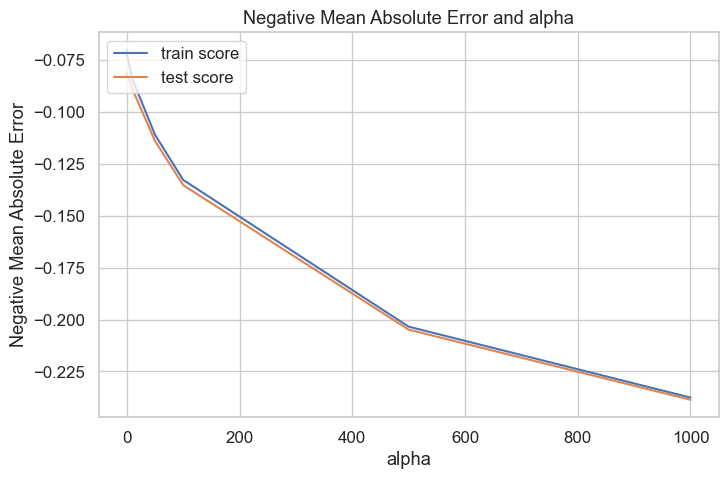

In [87]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [88]:
# list of alphas to tune
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head(10)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005512,0.006026,0.006018,0.003301,0.001,{'alpha': 0.001},-0.087264,-0.082441,-0.085412,-0.074975,...,-0.083300,0.004470,5,-0.069614,-0.070271,-0.068655,-0.073227,-0.069127,-0.070179,0.001615
1,0.007221,0.004549,0.000000,0.000000,0.01,{'alpha': 0.01},-0.087085,-0.082355,-0.085399,-0.074781,...,-0.083147,0.004472,3,-0.069646,-0.070289,-0.068665,-0.073279,-0.069205,-0.070217,0.001621
2,0.003279,0.003150,0.003267,0.004023,1.0,{'alpha': 1.0},-0.082543,-0.083149,-0.087155,-0.069624,...,-0.081606,0.006217,1,-0.072846,-0.073344,-0.071770,-0.076675,-0.072335,-0.073394,0.001722
3,0.004166,0.006074,0.003226,0.006451,2.0,{'alpha': 2.0},-0.082380,-0.084820,-0.088973,-0.069598,...,-0.082420,0.006759,2,-0.074830,-0.075206,-0.073863,-0.078622,-0.074249,-0.075354,0.001698
4,0.003927,0.007854,0.003125,0.006249,3.0,{'alpha': 3.0},-0.082968,-0.086202,-0.090111,-0.069843,...,-0.083225,0.007066,4,-0.076396,-0.076576,-0.075451,-0.080085,-0.075697,-0.076841,0.001675
5,0.003101,0.006202,0.006350,0.007779,4.0,{'alpha': 4.0},-0.083602,-0.087373,-0.091026,-0.070377,...,-0.083990,0.007201,6,-0.077764,-0.077725,-0.076767,-0.081301,-0.076972,-0.078106,0.001646
6,0.003101,0.006202,0.004727,0.006399,5.0,{'alpha': 5.0},-0.084604,-0.088524,-0.091908,-0.071048,...,-0.084846,0.007277,7,-0.078983,-0.078762,-0.077961,-0.082364,-0.078202,-0.079254,0.001598
7,0.006203,0.007597,0.006351,0.007780,6.0,{'alpha': 6.0},-0.085688,-0.089596,-0.092704,-0.071854,...,-0.085714,0.007282,8,-0.080121,-0.079798,-0.079122,-0.083359,-0.079417,-0.080363,0.001536
8,0.008904,0.007307,0.000601,0.001203,7.0,{'alpha': 7.0},-0.086783,-0.090632,-0.093459,-0.072707,...,-0.086569,0.007258,9,-0.081221,-0.080790,-0.080232,-0.084370,-0.080588,-0.081440,0.001499
9,0.006327,0.007752,0.003226,0.006452,8.0,{'alpha': 8.0},-0.087954,-0.091587,-0.094248,-0.073630,...,-0.087465,0.007219,10,-0.082243,-0.081775,-0.081301,-0.085350,-0.081703,-0.082474,0.001468


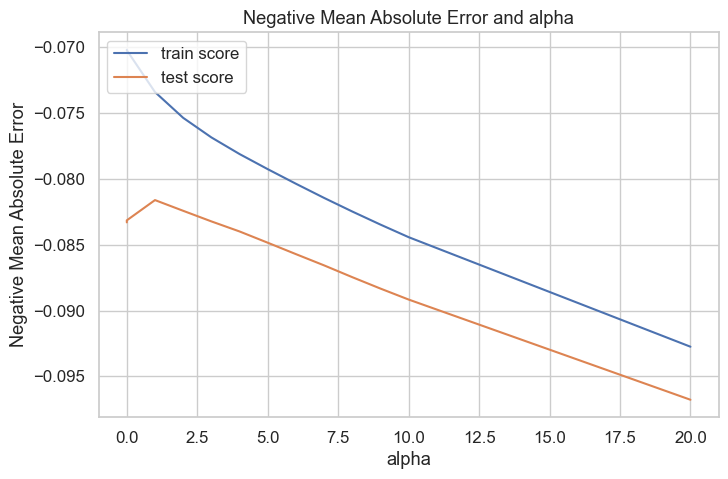

In [90]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [91]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))


Ridge()
 The best r2 score is obtained at alpha 1.0


#### Building ridge regression model with optimal alpha value

In [92]:
# Model building using optimal alpha
#ridge = Ridge(alpha=best_ridge_alpha)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [93]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']


We are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the vairbale is negatively related to the target variable Sale price ." For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in relaility the variable with -0.1 is more important to predict saleprice rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price.



In [94]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,10.341084,10.341084
3,OverallCond,0.456922,0.456922
14,BsmtUnfSF,0.352191,0.352191
2,OverallQual,0.339587,0.339587
9,BsmtExposure,0.305387,0.305387
11,BsmtFinSF1,0.304534,0.304534
38,PavedDrive,0.285515,0.285515
12,BsmtFinType2,0.271277,0.271277
79,Neighborhood_Blueste,-0.261466,0.261466
6,ExterCond,0.254116,0.254116


In [95]:
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.9326
Ridge regression test r2:  0.7503


#### Lasso Regression model

In [96]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [97]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.040999,0.010721,0.003834,0.006003,0.0001,{'alpha': 0.0001},-0.082725,-0.082412,-0.085623,-0.072041,...,-0.081593,0.004943,1,-0.071925,-0.072576,-0.070805,-0.075875,-0.071482,-0.072533,0.001768
1,0.010354,0.006940,0.000000,0.000000,0.001,{'alpha': 0.001},-0.084073,-0.088701,-0.092588,-0.072019,...,-0.084928,0.007010,2,-0.081390,-0.080448,-0.079784,-0.084418,-0.080043,-0.081217,0.001691
2,0.007628,0.007099,0.004926,0.006386,0.01,{'alpha': 0.01},-0.125700,-0.124836,-0.125016,-0.104682,...,-0.120564,0.008010,3,-0.120996,-0.118568,-0.118104,-0.120492,-0.116988,-0.119030,0.001500
3,0.003226,0.006451,0.000000,0.000000,0.05,{'alpha': 0.05},-0.260053,-0.247518,-0.254338,-0.228106,...,-0.252925,0.015286,4,-0.247566,-0.251917,-0.248868,-0.250572,-0.251874,-0.250159,0.001708
4,0.003102,0.006204,0.003226,0.006452,0.1,{'alpha': 0.1},-0.314645,-0.308787,-0.306159,-0.277179,...,-0.303902,0.013686,5,-0.302052,-0.304592,-0.303821,-0.306477,-0.299013,-0.303191,0.002526


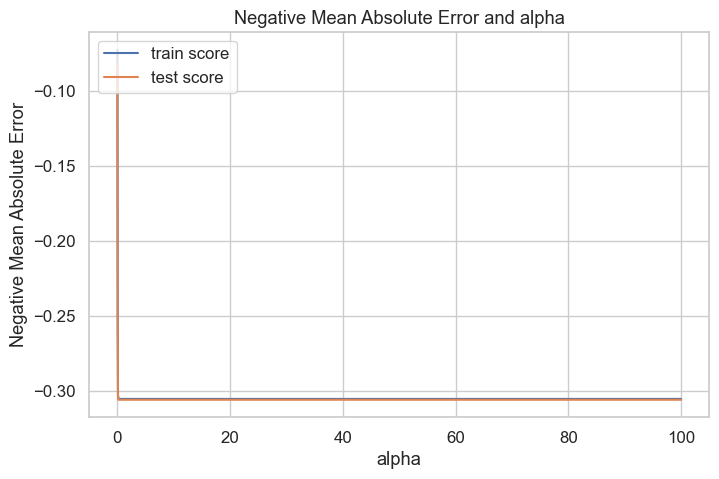

In [98]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()



In [99]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [101]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014867,0.003389,0.000408,0.000815,0.001,{'alpha': 0.001},-0.084073,-0.088701,-0.092588,-0.072019,...,-0.084928,0.007010,1,-0.081390,-0.080448,-0.079784,-0.084418,-0.080043,-0.081217,0.001691
1,0.003228,0.006456,0.005561,0.007090,0.01,{'alpha': 0.01},-0.125700,-0.124836,-0.125016,-0.104682,...,-0.120564,0.008010,2,-0.120996,-0.118568,-0.118104,-0.120492,-0.116988,-0.119030,0.001500
2,0.005112,0.000065,0.002845,0.000257,0.05,{'alpha': 0.05},-0.260053,-0.247518,-0.254338,-0.228106,...,-0.252925,0.015286,3,-0.247566,-0.251917,-0.248868,-0.250572,-0.251874,-0.250159,0.001708
3,0.006293,0.003174,0.001643,0.001356,0.1,{'alpha': 0.1},-0.314645,-0.308787,-0.306159,-0.277179,...,-0.303902,0.013686,4,-0.302052,-0.304592,-0.303821,-0.306477,-0.299013,-0.303191,0.002526
4,0.004255,0.001122,0.003391,0.000559,0.2,{'alpha': 0.2},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,5,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029


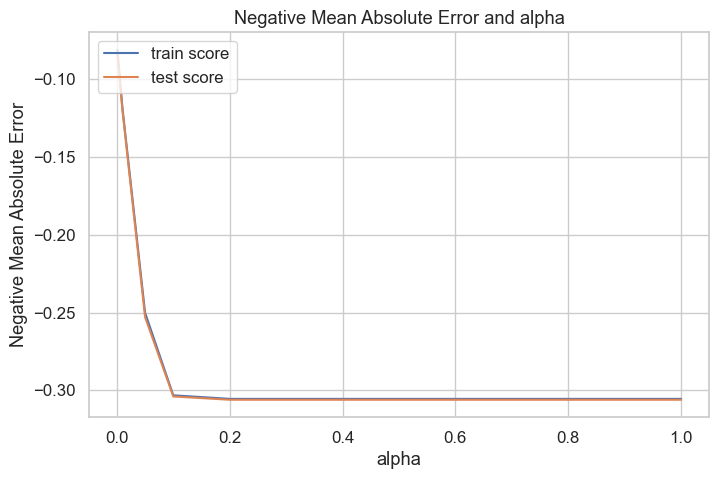

In [102]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [103]:
# Checking the best parameter(Alpha value)
model_cv.best_params_


{'alpha': 0.001}

#### Tunning it more

In [104]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [105]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.038974,0.008934,0.004123,0.002950,0.0001,{'alpha': 0.0001},-0.082725,-0.082412,-0.085623,-0.072041,...,-0.081593,0.004943,1,-0.071925,-0.072576,-0.070805,-0.075875,-0.071482,-0.072533,0.001768
1,0.010962,0.007132,0.003490,0.002341,0.001,{'alpha': 0.001},-0.084073,-0.088701,-0.092588,-0.072019,...,-0.084928,0.007010,2,-0.081390,-0.080448,-0.079784,-0.084418,-0.080043,-0.081217,0.001691
2,0.005561,0.000811,0.003041,0.001292,0.01,{'alpha': 0.01},-0.125700,-0.124836,-0.125016,-0.104682,...,-0.120564,0.008010,3,-0.120996,-0.118568,-0.118104,-0.120492,-0.116988,-0.119030,0.001500
3,0.004230,0.002120,0.001520,0.001281,0.05,{'alpha': 0.05},-0.260053,-0.247518,-0.254338,-0.228106,...,-0.252925,0.015286,4,-0.247566,-0.251917,-0.248868,-0.250572,-0.251874,-0.250159,0.001708
4,0.004968,0.000696,0.003239,0.000429,0.1,{'alpha': 0.1},-0.314645,-0.308787,-0.306159,-0.277179,...,-0.303902,0.013686,5,-0.302052,-0.304592,-0.303821,-0.306477,-0.299013,-0.303191,0.002526


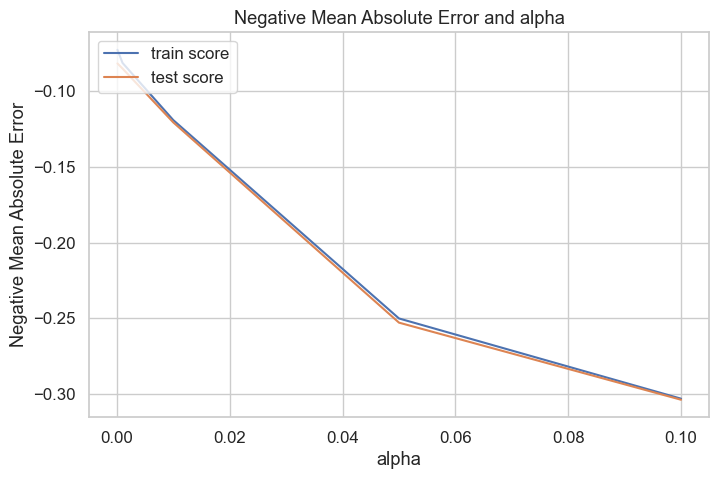

In [106]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [107]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [108]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.063724,0.006673,0.001226,0.001502,0.00001,{'alpha': 1e-05},-0.087021,-0.081855,-0.085502,-0.074651,...,-0.082981,0.004511,2,-0.069754,-0.070377,-0.068796,-0.073524,-0.069347,-0.070359,0.001665
1,0.048102,0.004215,0.007998,0.005704,0.0001,{'alpha': 0.0001},-0.082725,-0.082412,-0.085623,-0.072041,...,-0.081593,0.004943,1,-0.071925,-0.072576,-0.070805,-0.075875,-0.071482,-0.072533,0.001768
2,0.013180,0.006521,0.000608,0.001216,0.001,{'alpha': 0.001},-0.084073,-0.088701,-0.092588,-0.072019,...,-0.084928,0.007010,3,-0.081390,-0.080448,-0.079784,-0.084418,-0.080043,-0.081217,0.001691
3,0.007077,0.008765,0.003428,0.006125,0.01,{'alpha': 0.01},-0.125700,-0.124836,-0.125016,-0.104682,...,-0.120564,0.008010,4,-0.120996,-0.118568,-0.118104,-0.120492,-0.116988,-0.119030,0.001500
4,0.004759,0.000967,0.002714,0.000877,0.05,{'alpha': 0.05},-0.260053,-0.247518,-0.254338,-0.228106,...,-0.252925,0.015286,5,-0.247566,-0.251917,-0.248868,-0.250572,-0.251874,-0.250159,0.001708


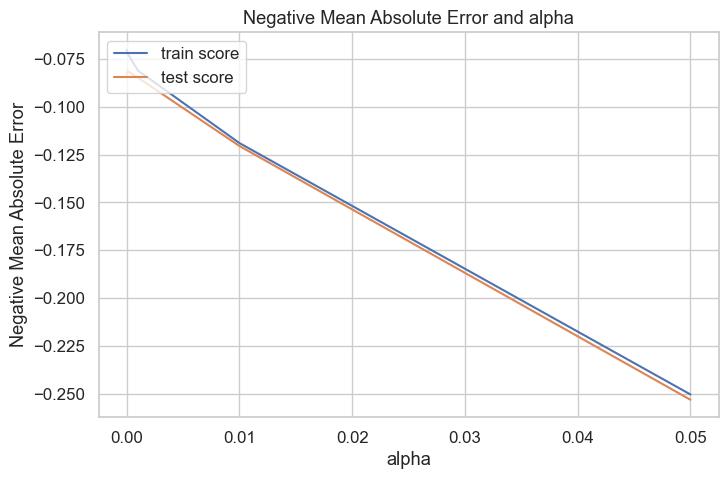

In [109]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [110]:
# Checking the best parameter(Alpha value)
model_cv.best_params_


{'alpha': 0.0001}

In [111]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043812,0.008204,0.005327,0.006685,0.00001,{'alpha': 1e-05},-0.087021,-0.081855,-0.085502,-0.074651,...,-0.082981,0.004511,2,-0.069754,-0.070377,-0.068796,-0.073524,-0.069347,-0.070359,0.001665
1,0.043093,0.009280,0.000405,0.000810,0.0001,{'alpha': 0.0001},-0.082725,-0.082412,-0.085623,-0.072041,...,-0.081593,0.004943,1,-0.071925,-0.072576,-0.070805,-0.075875,-0.071482,-0.072533,0.001768
2,0.007606,0.008022,0.007338,0.006851,0.001,{'alpha': 0.001},-0.084073,-0.088701,-0.092588,-0.072019,...,-0.084928,0.007010,3,-0.081390,-0.080448,-0.079784,-0.084418,-0.080043,-0.081217,0.001691


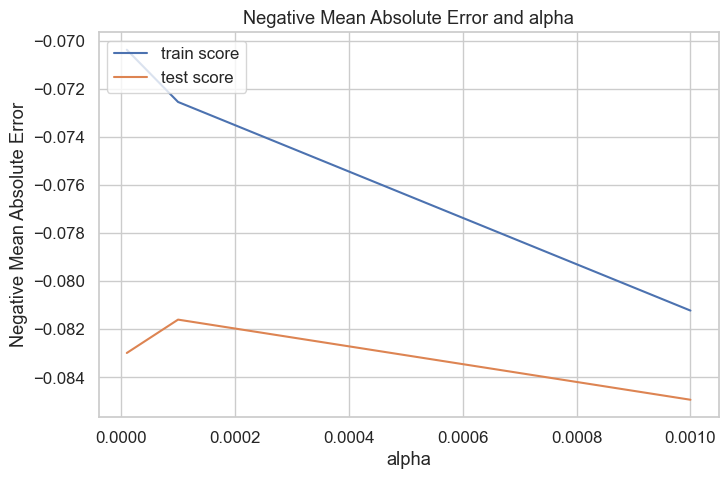

In [113]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [114]:
# Checking the best parameter(Alpha value)
model_cv.best_params_


{'alpha': 0.0001}

In [115]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))


Lasso Regression train r2: 0.9332657373842753
Lasso Regression test r2: 0.7429203650450068


In [116]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']


We are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the vairbale is negatively related to the target variable Sale price ." For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in relaility the variable with -0.1 is more important to predict saleprice rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price.



In [117]:
lasso_coef

,Feature,Coef,mod
0,LotFrontage,10.236537,10.236537
1,LotArea,0.184140,0.184140
2,OverallQual,0.489549,0.489549
3,OverallCond,0.503858,0.503858
4,ExterCond,0.194072,0.194072
5,BsmtFinSF1,-0.050936,0.050936
6,BsmtFinSF2,0.164265,0.164265
7,BsmtUnfSF,0.041262,0.041262
8,TotalBsmtSF,-0.000000,0.000000
9,CentralAir,0.468811,0.468811


In [118]:

#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)


,Feature,Coef,mod
0,LotFrontage,10.236537,10.236537
14,BsmtFullBath,0.807093,0.807093
3,OverallCond,0.503858,0.503858
2,OverallQual,0.489549,0.489549
9,CentralAir,0.468811,0.468811
79,Exterior1st_CBlock,-0.460073,0.460073
38,MSZoning_RH,0.361975,0.361975
40,MSZoning_RM,0.287841,0.287841
41,Street_Pave,0.244119,0.244119
39,MSZoning_RL,0.225514,0.225514


In [119]:

lasso.coef_

array([ 1.84140413e-01,  4.89548647e-01,  5.03857679e-01,  1.94071688e-01,
       -5.09355749e-02,  1.64265268e-01,  4.12620232e-02, -0.00000000e+00,
        4.68810615e-01,  7.97320654e-02,  0.00000000e+00,  5.53018822e-02,
       -2.62396229e-02,  8.07093440e-01,  6.59809072e-02,  8.42927293e-02,
        6.72714751e-02, -1.22893182e-01,  7.07039517e-02,  1.32059553e-01,
        7.89173649e-02,  1.46919525e-01,  9.76897466e-02,  1.81057380e-01,
       -1.72900588e-03,  7.11742500e-02,  6.08899923e-02, -9.12739838e-02,
       -5.00657061e-02, -4.29110486e-02, -3.85436817e-02, -2.19284062e-02,
        0.00000000e+00, -1.90481106e-02, -9.30371910e-02, -1.58478641e-03,
       -3.54283734e-02,  3.61975179e-01,  2.25513891e-01,  2.87840862e-01,
        2.44119266e-01,  8.57573778e-02, -1.23795171e-03,  4.08132272e-02,
       -7.95978325e-02, -6.31551224e-02,  1.15756303e-01, -9.23535452e-02,
        6.27554452e-02, -5.99949008e-02,  1.05464279e-01,  7.35302163e-02,
       -9.44075477e-02,  

## Data Modeling and evaluation - Final model


We will make use of Lasso Regression model because it is using less numbers of variables and giving almost the same accuract. Its more efficient model than Ridge regression model

In [120]:
# We have used lasso for building the modle as we got the optimal value of alpha.
lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))


0.9332657373842753
0.7429203650450068


## Model Inference and Conclusion l
#The company wants to know:

Which variables are significant in predicting the price of a house:

LotFrontage : If the house Linear feet of street connected to property area increase then the Price increase.

BsmtFullBath : : If the BsmtFullBath area is more the SalePrice is higher

Overall Condition: If the Overall Condition is Excellent the SalePrice is higher

MSZoning_RH : If the house i near residential area then the SalePrice is higher

Overall quality: If the Overall Condition is Excellent the SalePrice is higher

Exterior1st_CBlock : IF the house Exterior1st is CBlock then price is less.

Garage Area: If the Garage area is high the SalePrice is higher

CentralAir: If the CentralAir is Yes the SalePrice is higher

How well those variables describe the price of a house.

These varibles tells about the linear relation with respect the price by which the company can improve ther sales. For instance they can concentrate in invseting properties wich may have high SalePrice in future


## Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Answer : Optimal value of alpha:
For Ridge regression :1.0
For Lasso Regression :0.0001


## Question 2

#### You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will #### you choose to apply and why?

#### Answer : I will choose Ridge regression because its optimal value of alpha is high.



In [121]:
# For Ridge regression aplha is 1.0 and now doubling it and making it 2.0
# Model building using optimal alpha
ridge_modified = Ridge(alpha=2.0)
ridge_modified.fit(X_train, y_train)

Ridge(alpha=2.0)

In [122]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,10.341084,10.341084
3,OverallCond,0.456922,0.456922
14,BsmtUnfSF,0.352191,0.352191
2,OverallQual,0.339587,0.339587
9,BsmtExposure,0.305387,0.305387
11,BsmtFinSF1,0.304534,0.304534
38,PavedDrive,0.285515,0.285515
12,BsmtFinType2,0.271277,0.271277
79,Neighborhood_Blueste,-0.261466,0.261466
6,ExterCond,0.254116,0.254116


In [123]:
y_train_pred = ridge_modified.predict(X_train)
y_test_pred = ridge_modified.predict(X_test)

print("Ridge Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Ridge Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))


Ridge Regression train r2: 0.9293163575279512
Ridge Regression test r2: 0.758459681890284


In [124]:
## For Lasso regression aplha is 0.0001 and now doubling it and making it 0.0002
# Model building using optimal alpha
lasso_modified = Lasso(alpha=0.0002)
lasso_modified.fit(X_train, y_train)


Lasso(alpha=0.0002)

In [125]:
y_train_pred = lasso_modified.predict(X_train)
y_test_pred = lasso_modified.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9299878452370707
Lasso Regression test r2: 0.7498289182811455


In [126]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']


In [127]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)


,Feature,Coef,mod
0,LotFrontage,10.236537,10.236537
14,BsmtFullBath,0.807093,0.807093
3,OverallCond,0.503858,0.503858
2,OverallQual,0.489549,0.489549
9,CentralAir,0.468811,0.468811
79,Exterior1st_CBlock,-0.460073,0.460073
38,MSZoning_RH,0.361975,0.361975
40,MSZoning_RM,0.287841,0.287841
41,Street_Pave,0.244119,0.244119
39,MSZoning_RL,0.225514,0.225514


## Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?



In [128]:
# Drooping the first five important predictors
X_train_new = X_train.drop(['LotFrontage','BsmtFullBath','OverallCond','CentralAir','OverallQual'],axis=1)
X_test_new = X_test.drop(['LotFrontage','BsmtFullBath','OverallCond','CentralAir','OverallQual'],axis=1)

X_test_new.head()
X_train_new.shape


(988, 95)

In [129]:
X_test_new.shape

(424, 95)

In [130]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_new, y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [131]:
GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [132]:
#Creating the results dataframe.
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
#reading the results
lasso_cv_modified_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.032691,0.007646,0.001211,0.001514,0.0001,{'alpha': 0.0001},-0.097372,-0.092644,-0.092770,-0.085598,...,-0.092400,0.003812,1,-0.079586,-0.081110,-0.080292,-0.083809,-0.081069,-0.081173,0.001432
1,0.007335,0.006662,0.008736,0.006416,0.001,{'alpha': 0.001},-0.100683,-0.102785,-0.100980,-0.084383,...,-0.097108,0.006665,2,-0.090229,-0.091294,-0.090877,-0.094354,-0.090726,-0.091496,0.001469
2,0.003126,0.006251,0.003124,0.006247,0.01,{'alpha': 0.01},-0.134867,-0.136696,-0.134323,-0.115937,...,-0.130369,0.007541,3,-0.129819,-0.127246,-0.128216,-0.130883,-0.126916,-0.128616,0.001517


In [133]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043812,0.008204,0.005327,0.006685,0.00001,{'alpha': 1e-05},-0.087021,-0.081855,-0.085502,-0.074651,...,-0.082981,0.004511,2,-0.069754,-0.070377,-0.068796,-0.073524,-0.069347,-0.070359,0.001665
1,0.043093,0.009280,0.000405,0.000810,0.0001,{'alpha': 0.0001},-0.082725,-0.082412,-0.085623,-0.072041,...,-0.081593,0.004943,1,-0.071925,-0.072576,-0.070805,-0.075875,-0.071482,-0.072533,0.001768
2,0.007606,0.008022,0.007338,0.006851,0.001,{'alpha': 0.001},-0.084073,-0.088701,-0.092588,-0.072019,...,-0.084928,0.007010,3,-0.081390,-0.080448,-0.079784,-0.084418,-0.080043,-0.081217,0.001691


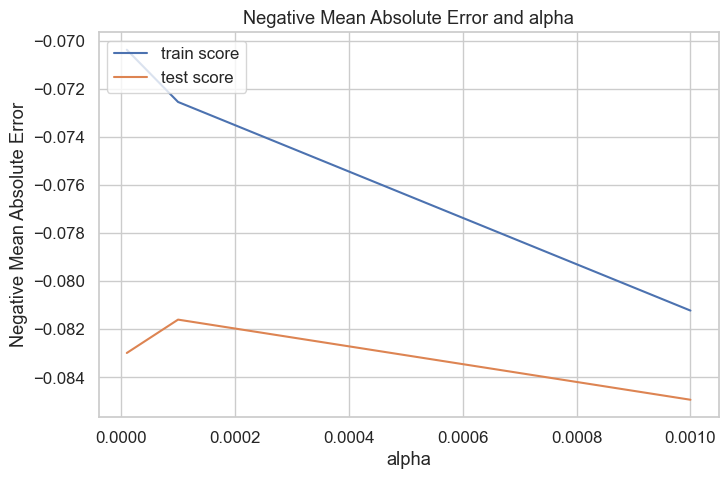

In [134]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [135]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

## Building Lasso regression model with optimal alpha value

In [136]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))


Lasso Regression train r2: 0.9332657373842753
Lasso Regression test r2: 0.7429203650450068


In [137]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']



In [138]:
#selecting the top 5 variables
lasso_coef.sort_values(by='mod',ascending=False).head(5)


,Feature,Coef,mod
0,LotFrontage,10.236537,10.236537
14,BsmtFullBath,0.807093,0.807093
3,OverallCond,0.503858,0.503858
2,OverallQual,0.489549,0.489549
9,CentralAir,0.468811,0.468811


## Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?



In [139]:
# Drooping the first five important predictors

X_train_new = X_train.drop(['LotFrontage','BsmtFullBath','OverallCond','CentralAir','OverallQual'],axis=1)
X_test_new = X_test.drop(['LotFrontage','BsmtFullBath','OverallCond','CentralAir','OverallQual'],axis=1)

X_test_new.head()
X_train_new.shape

(988, 95)

In [140]:
X_test_new.shape

(424, 95)

In [141]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_new, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [142]:
GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [143]:
#Creating the results dataframe.
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
#reading the results
lasso_cv_modified_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.032617,0.007212,0.005329,0.006957,0.0001,{'alpha': 0.0001},-0.097372,-0.092644,-0.092770,-0.085598,...,-0.092400,0.003812,1,-0.079586,-0.081110,-0.080292,-0.083809,-0.081069,-0.081173,0.001432
1,0.003531,0.007063,0.008638,0.006163,0.001,{'alpha': 0.001},-0.100683,-0.102785,-0.100980,-0.084383,...,-0.097108,0.006665,2,-0.090229,-0.091294,-0.090877,-0.094354,-0.090726,-0.091496,0.001469
2,0.003158,0.006316,0.003123,0.006246,0.01,{'alpha': 0.01},-0.134867,-0.136696,-0.134323,-0.115937,...,-0.130369,0.007541,3,-0.129819,-0.127246,-0.128216,-0.130883,-0.126916,-0.128616,0.001517


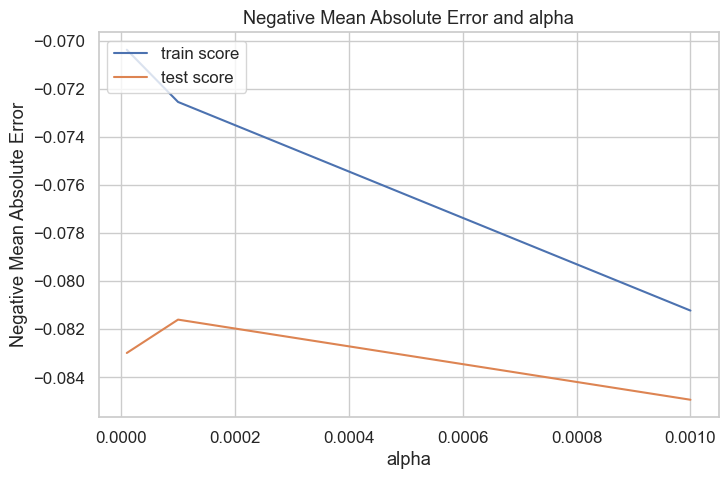

In [144]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [145]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [146]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9193445766488607
Lasso Regression test r2: 0.7173933650037776


In [147]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [148]:
#selecting the top 5 variables
lasso_coef.sort_values(by='mod',ascending=False).head(5)

,Feature,Coef,mod
0,LotArea,10.410455,10.410455
10,FullBath,0.925235,0.925235
1,ExterCond,0.576124,0.576124
6,1stFlrSF,0.538325,0.538325
33,MSZoning_RH,0.481370,0.481370
